# «Модель прогнозирования стоимости жилья для агентства недвижимости»
Курс Специализация Data Science Дипломный проект. Бриф учебного кейса

## Постановка задачи (Business Understanding)  

**Описание проекта**  
Агентство недвижимости столкнулось с проблемой: риелторы тратят слишком много времени на сортировку объявлений и поиск выгодных предложений. Поэтому скорость их реакции и качество анализа не дотягивают до уровня конкурентов. Это сказывается на финансовых показателях агентства.  


**Бизнес-задача**  
Повысить прибыль агентства недвижимости за счет увеличения скорости реакции риелторов и качества их работы при продаже объектов недвижимости.  

**Техническая задача для специалиста Data Science**  
Разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок на продажу объектов недвижимости.  

**Основные цели проекта:**
1. Произвести предобработку и разведывательный анализ набора реальных данных (обработать пропуски, дубликаты и выбросы, устранить ошибки ввода, расшифровать сокращения, отыскать закономерности, сгенерировать новые признаки с использованием внешних источников).
2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.  
3. Построить несколько моделей для прогнозирования стоимости недвижимости и отобрать лучшую по целевой метрике.  
4. Разработать небольшой веб-сервис, на вход которого поступали бы данные о некоторой выставленной на продажу недвижимости, а сервис прогнозировал бы его стоимость. 

## Знакомство с данными

### Описание данных:

* 'status' — статус продажи;
* 'private pool' и 'PrivatePool' — наличие собственного бассейна;
* 'propertyType' — тип объекта недвижимости;
* 'street' — адрес объекта;
* 'baths' — количество ванных комнат;
* 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);
* 'fireplace' — наличие камина;
* 'city' — город;
* 'schools' — сведения о школах в районе;
* 'sqft' — площадь в футах;
* 'zipcode' — почтовый индекс;
* 'beds' — количество спален;
* 'state' — штат;
* 'stories' — количество этажей;
* 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);
* target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).

### Важные сведения о данных:
- Признаки 'homeFacts' и 'schools' представляют собой словари и содержат несколько типов сведений. Необходимо десериализовать содержимое этих признаков. Если в нём есть полезные данные, необходимо создать из них новые признаки.

- Типы жилья и их основные характеристики (может пригодиться при обработке признака propertyType):
   
    ➔ apartment — съёмная квартира (нельзя купить);

    ➔ condo — кондоминиум (можно купить);

    ➔ co-op — квартира в жилищном кооперативе;

    ➔ single-family (detached, tiny home) — односемейный (отдельный, маленький) дом;

    ➔ townhome, townhouse — таунхаус;

    ➔ cape cod — черепичная крыша, облицовка деревянным сайдингом, дверь в центре здания, окна по бокам, один-два этажа;

    ➔ colonial home — минимум два этажа, симметрия, лестница в центре здания, строгий внешний вид;

    ➔ contemporary — чистые, простые линии, нейтральные цвета, натуральные текстуры;

    ➔ cottage — небольшая уютная веранда, небольшие жилые помещения;

    ➔ craftsman — деревянные элементы ручной работы, выступающие балки, большие колонны;

    ➔ Greek revival — большие белые колонны, украшения в греческом стиле, нарядный вход;

    ➔ farmhouse — прямоугольная планировка, большое крыльцо, амбарная крыша;

    ➔ French country — влияние прованса, облицовка камнем, состаренный вид;

    ➔ Mediterranean — белая штукатурка, дерево и камень в тёплых тонах, черепичные крыши, элементы испанских и итальянских вилл;

    ➔ midcentury modern — сочетание плавных природных и строгих геометрических линий, гладкость, лаконичность, большие окна;

    ➔ ranch — один этаж, низкая крыша, открытые жилые помещения, задний двор;

    ➔ split-level — жилые помещения разделены короткими лестничными пролётами;

    ➔ Tudor — деревянные балки, каменная кладка, асимметричная крутая двускатная крыша;

    ➔ Victorian (Queen Anne Houses) — два-три и более этажей, богатый декор, крутая двускатная крыша, небольшие башенки, яркий фасад;

    ➔ European Houses style — кирпич или камень, высокая крутая крыша, высокие окна, часто со ставнями, традиционные декоративные детали (фронтоны, замковые камни);

    ➔ log home — деревянный дом.


- Некоторые жаргонные сокращения — для исправления дублирования (может пригодиться при обработке признака propertyType):
   
    ➔ 'manufactured home (house)' = 'mobile' = 'prefab' = 'modular';

    ➔ 'mobile' = 'mo2 le' = 'mo2le';

    ➔ 'cabin' = 'ca2 n' = 'ca2n';

    ➔ midcentury = mid century = mid-century;

    ➔ single family = single-family home.

- Некоторые термины, используемые в сфере купли-продажи недвижимости:
  
    ➔ status — статус, состояние.

    ➔ estate — объект недвижимости.

    ➔ 'foreclosed' ('foreclosure') — «лишён права выкупа». Это процесс, когда недвижимость переходит к кредитору из-за неуплаты ипотеки заёмщиком. Продажа foreclosure-недвижимости отличается от традиционных продаж.

    ➔ 'pre foreclosure' ('pre foreclosure auction') — «до выкупа», «аукцион до выкупа».

    ➔ 'under contract showing' ('under contract show', 'under contract', 'active under contract') — предложение о покупке уже сделано, но не принято продавцом окончательно, и недвижимость продолжают показывать другим потенциальным покупателям.

    ➔ 'under contract backups', 'active backup', 'backup contract' — предложение о покупке уже сделано и принято продавцом, однако он открыт для резервных предложений.

    ➔ 'contingency' — дополнительные обстоятельства (критерии, которым должен соответствовать продавец/покупатель до завершения сделки).

    ➔ 'contingency contract' — контракт на случай возникновения дополнительных обстоятельств.

    ➔ 'active contingency' — сделка уже практически состоялась, однако продавцу/покупателю для её завершения необходимо выполнить какие-то условия.

    ➔ 'insp inspection contingency' — ситуация, когда покупатель может официально проинспектировать объект недвижимости в определённый период времени.

    ➔ 'pending escape clause' — договор, предполагающий свободный выход сторон из него.

    ➔ 'pending backup wanted' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям и принимать резервные предложения.

    ➔ 'pending take backups' — условие, предполагающее, что продавец может принимать резерные предложения, если сделка с текущим покупателем не состоится.

    ➔ 'pending continue show' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям на случай, если текущая сделка не состоится.

    ➔ 'pending inspection' — «в ожидании инспекции».

    ➔ 'due diligence period' — период, в течение которого покупатель имеет право проинспектировать недвижимость и изучить всю важную для заключения сделки информацию.

    ➔ 'activated' — «активен», открыт для покупки.

    ➔ 'active with contract' — продавец уже принял предложение о покупке, однако сделка ещё не закрыта.

    ➔ 'active with offer' — продавец принял предложение о покупке, однако ищет резервные предложения на случай, если сделка с текущим покупателем не   состоится.

    ➔ 'active auction', 'auction active', 'auction' — продажа недвижимости с помощью аукциона.

    ➔ cooling-off period — период, в течение которого покупатель может расторгнуть договор после завершения сделки.


In [216]:
import pandas as pd
import numpy as np

import sweetviz as sv

import seaborn as sns
import matplotlib.pyplot as plt

import re
import requests
from bs4 import BeautifulSoup

import category_encoders as ce
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from catboost import Pool, CatBoostRegressor
import optuna
import pickle


import warnings
warnings.filterwarnings('ignore')

In [217]:
# Читаем данные
df = pd.read_csv('data/data.csv')
df.head()

status private pool        propertyType               street    baths  \
0    Active          NaN  Single Family Home       240 Heather Ln      3.5   
1  for sale          NaN  single-family home    12911 E Heroy Ave  3 Baths   
2  for sale          NaN  single-family home    2005 Westridge Rd  2 Baths   
3  for sale          NaN  single-family home  4311 Livingston Ave  8 Baths   
4  for sale          NaN            lot/land       1524 Kiscoe St      NaN   

                                           homeFacts fireplace  \
0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Gas Logs   
1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...       NaN   
2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...       yes   
3  {'atAGlanceFacts': [{'factValue': '2006', 'fac...       yes   
4  {'atAGlanceFacts': [{'factValue': '', 'factLab...       NaN   

             city                                            schools  \
0  Southern Pines  [{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...   
1  Spokane Valley  [{'rating': ['4/10', 'None/10', '4/10'], 'data...   
2     Los Angeles  [{'rating': ['8/10', '4/10', '8/10'], 'data': ...   
3          Dallas  [{'rating': ['9/10', '9/10', '10/10', '9/10'],...   
4        Palm Bay  [{'rating': ['4/10', '5/10', '5/10'], 'data': ...   

         sqft zipcode    beds state stories mls-id PrivatePool       MlsId  \
0        2900   28387       4    NC     NaN    NaN         NaN      611019   
1  1,947 sqft   99216  3 Beds    WA     2.0    NaN         NaN   201916904   
2  3,000 sqft   90049  3 Beds    CA     1.0    NaN         yes  FR19221027   
3  6,457 sqft   75205  5 Beds    TX     3.0    NaN         NaN    14191809   
4         NaN   32908     NaN    FL     NaN    NaN         NaN      861745   

       target  
0    $418,000  
1    $310,000  
2  $2,895,000  
3  $2,395,000  
4      $5,000

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [219]:
df.describe()

status private pool        propertyType                 street  \
count     337267         4181              342452                 377183   
unique       159            1                1280                 337076   
top     for sale          Yes  single-family home  Address Not Disclosed   
freq      156104         4181               92206                    672   

          baths                                          homeFacts fireplace  \
count    270847                                             377185    103114   
unique      229                                             321009      1652   
top     2 Baths  {'atAGlanceFacts': [{'factValue': '', 'factLab...       yes   
freq      52466                                               7174     50356   

           city                                            schools    sqft  \
count    377151                                             377185  336608   
unique     2026                                             297365   25405   
top     Houston  [{'rating': [], 'data': {'Distance': [], 'Grad...       0   
freq      24442                                               4204   11854   

       zipcode    beds   state stories   mls-id PrivatePool   MlsId    target  
count   377185  285903  377185  226469    24942       40311  310305    374704  
unique    4549    1184      39     347    24907           2  232944     43939  
top      32137  3 Beds      FL     1.0  No MLS#         yes  NO MLS  $225,000  
freq      2141   53459  115449   67454        3       28793      24      1462

Для ускорения знакомства с данными сделаем обзорный отчет с помощью sweetviz

In [220]:
report = sv.analyze(df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated.



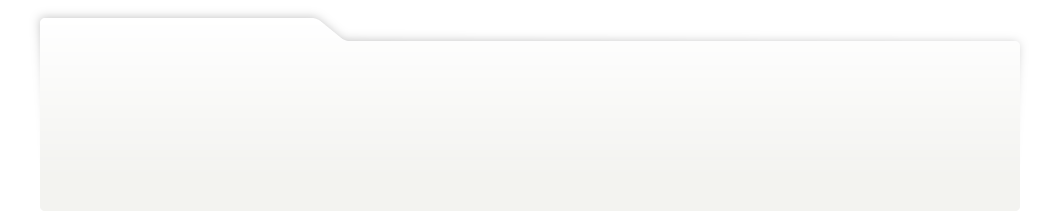
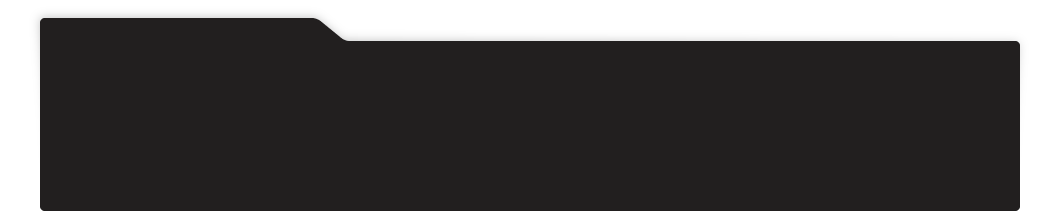
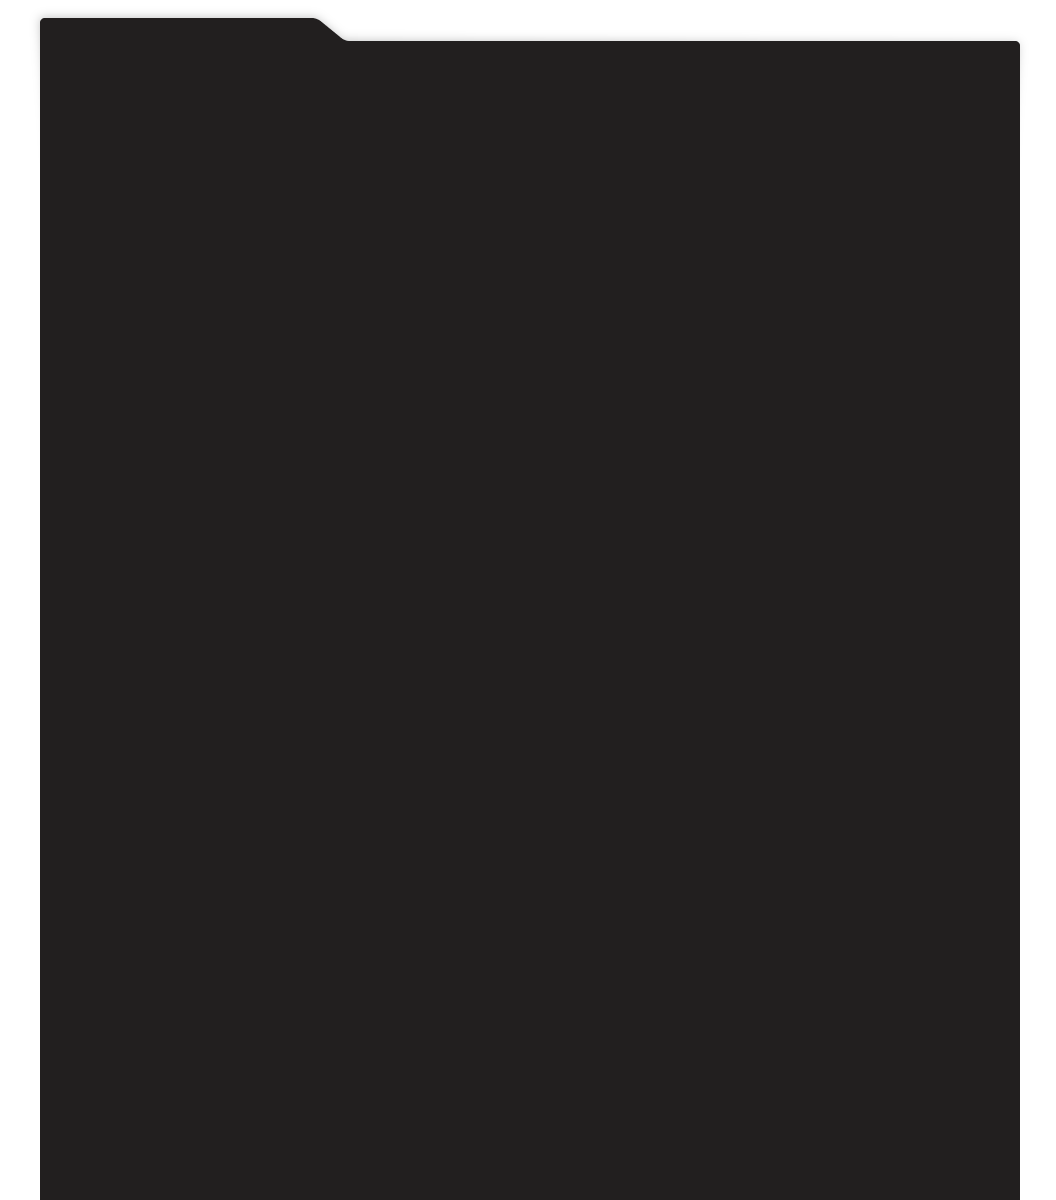
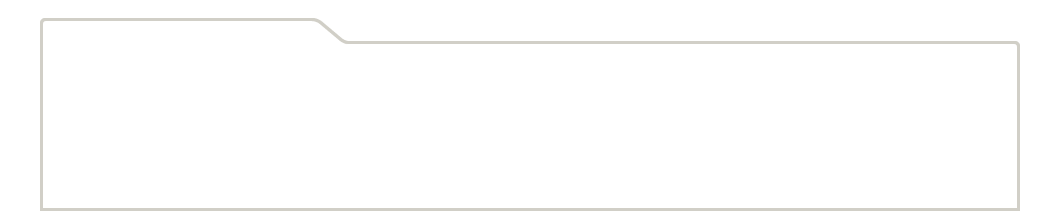
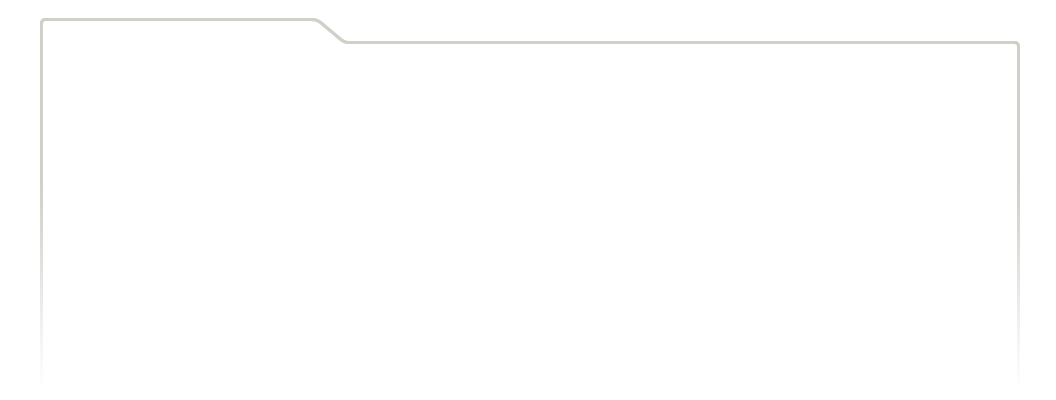
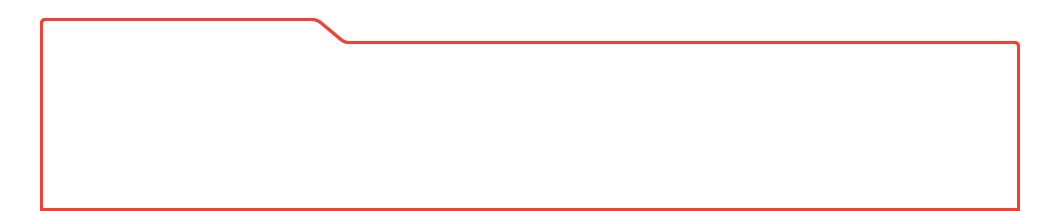
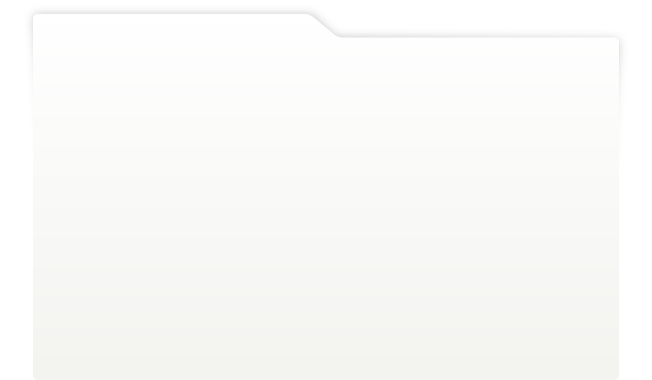
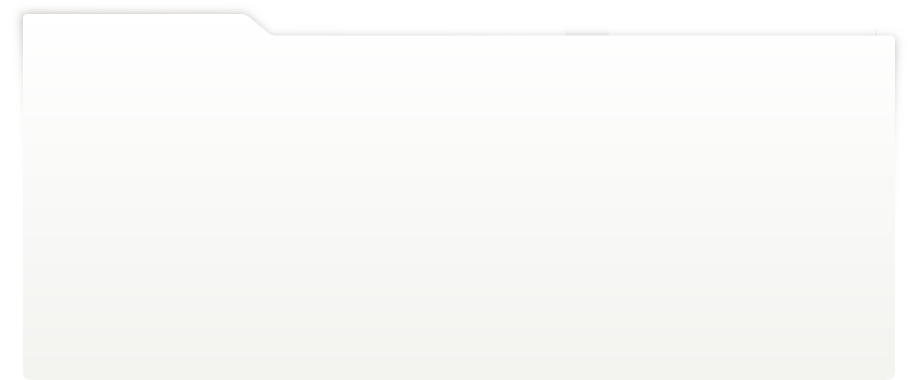
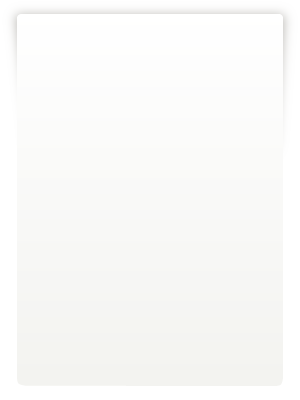
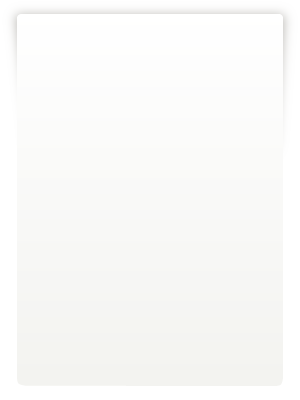
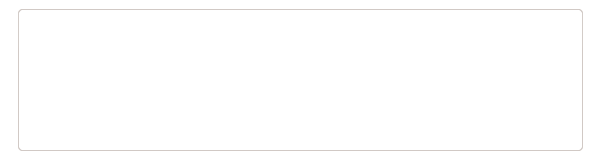
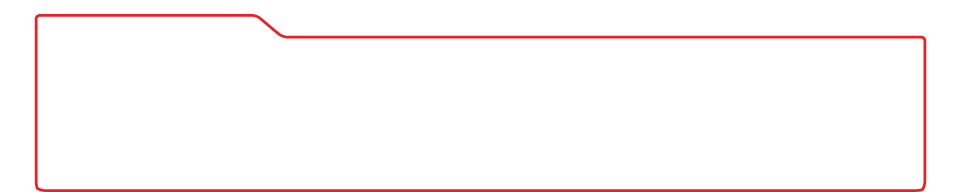
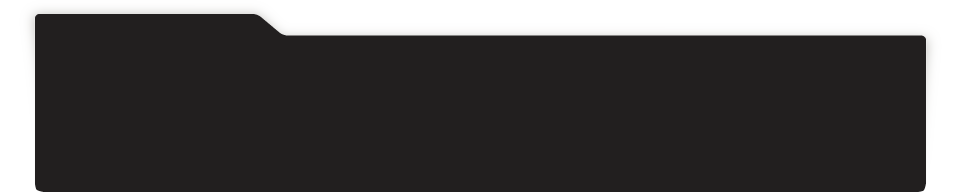
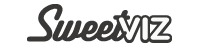
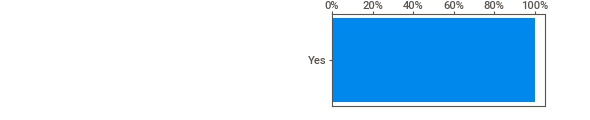
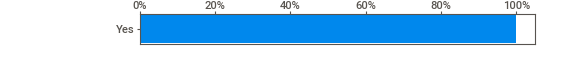
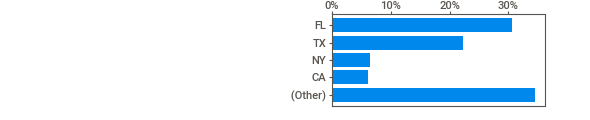
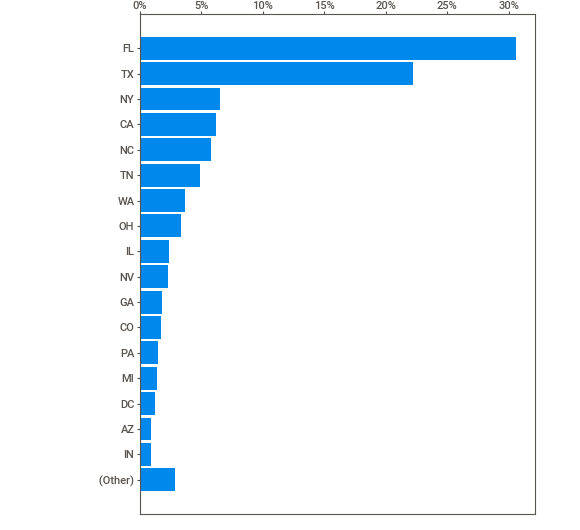
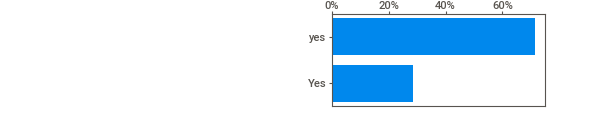
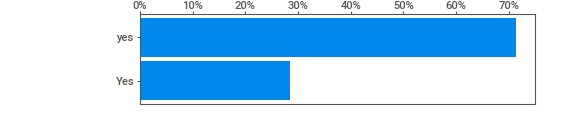
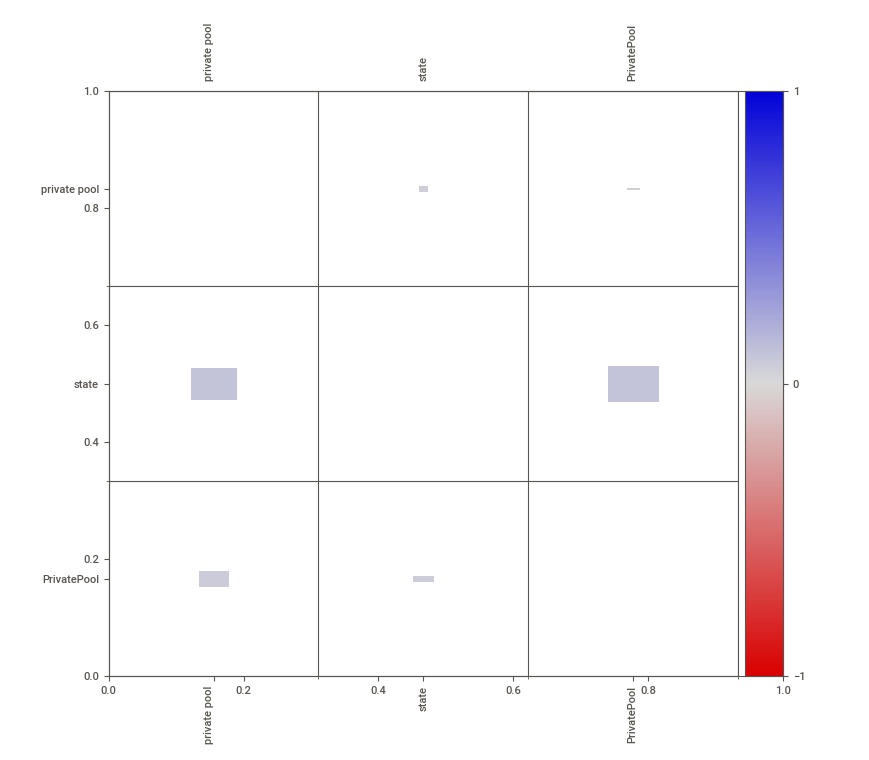
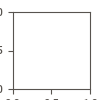

In [221]:
report.show_html('report.html', open_browser=False)
report.show_notebook(h=3000, scale=0.95)

Посмотрим пропуски в данных

In [222]:
missing_data = df.isnull().sum()

for column_name, missing_count in missing_data.items():
    if missing_count > 0:
        percentage = (missing_count / len(df)) * 100
        print(f'{column_name}: {missing_count} пропусков ({percentage:.2f}% от общего числа данных в столбце)')

status: 39918 пропусков (10.58% от общего числа данных в столбце)
private pool: 373004 пропусков (98.89% от общего числа данных в столбце)
propertyType: 34733 пропусков (9.21% от общего числа данных в столбце)
street: 2 пропусков (0.00% от общего числа данных в столбце)
baths: 106338 пропусков (28.19% от общего числа данных в столбце)
fireplace: 274071 пропусков (72.66% от общего числа данных в столбце)
city: 34 пропусков (0.01% от общего числа данных в столбце)
sqft: 40577 пропусков (10.76% от общего числа данных в столбце)
beds: 91282 пропусков (24.20% от общего числа данных в столбце)
stories: 150716 пропусков (39.96% от общего числа данных в столбце)
mls-id: 352243 пропусков (93.39% от общего числа данных в столбце)
PrivatePool: 336874 пропусков (89.31% от общего числа данных в столбце)
MlsId: 66880 пропусков (17.73% от общего числа данных в столбце)
target: 2481 пропусков (0.66% от общего числа данных в столбце)


Можно сделать предварительные выводы.

**В данных есть множество пропущенных значений:**
Во первых целевой признак "target" содержит менее 1% пропущенных значений (или 2 481 запись). Эти записи не могут быть использованы для обучения модели и могут быть удалены.
Далее:
- Признак системы мультилистинга "msl-id" содержит 93% пропусков, в то время как его дубликат "MlsId" имеет только 18% пропусков. Возможно, объединение этих столбцов уменьшит процент пропусков до приемлемого уровня. Однако стоит обратить внимание на высокий процент уникальных значений (более 60%). Вероятно, эти признаки не несут существенной информации и их можно удалить.
- Признак "наличие бассейна" разделен на два столбца, "private pool" и "PrivatePool," с 99% и 89% пропусков соответственно. Объединение этих столбцов не снизит процент пропусков до приемлемого уровня, поэтому признак следует удалить.
- Признак "fireplace" содержит 73% пропущенных значений, для упрощения анализа, удаляем этот признак.

Признаки с высоким процентом уникальных значений не являются информативными данными:
- "homeFacts" имеет 85% уникальных значений. В разделе анализа данных (EDA) можно попробовать извлечь полезную информацию из этого признака, такую как год постройки, наличие отопления, кондиционирования, парковки и другие характеристики. После извлечения этой информации можно рассмотреть удаление признака "homeFacts."
- "schools" имеет 79% уникальных значений. Этот признак может содержать информацию о школах, находящихся рядом с объектом недвижимости, можно извлечь информацию из этого признака и затем рассмотреть его удаление.
- "street" имеет 89% уникальных значений и представляет собой улицу, на которой находится объект недвижимости. Он может быть полезен для отображения объекта на карте, но маловероятно, что он будет полезен для прогнозирования цен на недвижимость. Поэтому можно рассмотреть его удаление.
- "city" содержит 2009 уникальных названий городов. Он может быть полезен для анализа, но из-за большого числа уникальных значений, его ценность ограничена. Пустые значения следует удалить, а затем можно рассмотреть создание дополнительного признака, например, "столица штата."
- "zipcode" также имеет много уникальных значений. Этот признак может быть полезен для анализа городов и штатов, после чего его можно удалить.


Количество полных дубликатов - 50 записей. Эти дубликаты следует удалить.

## Подготовка и очистка данных

### Очистка данных

In [223]:
print('Размерность до удаления признаков и пропусков:', df.shape)

# удаляем признаки 'mls-id', 'MlsId', 'fireplace'
df.drop(['mls-id', 'MlsId', 'fireplace'], axis=1, inplace=True)

# дубликаты
df.drop_duplicates(inplace=True)

# удаляем пропуски в целевом признаке
df.dropna(axis=0, subset='target', inplace=True)

# очищаем города от пропусков
df.dropna(axis=0, subset='city', inplace=True)

print('Размерность после отработки:', df.shape)

Размерность до удаления признаков и пропусков: (377185, 18)
Размерность после отработки: (374532, 15)


Удалены 2653 строки и 3 столбца

In [224]:
# вспомогательные функции для преобразования данных

def outliers_iqr(data, feature):
    """
    Функция определения выбросов по методу Тьюки
    """
    # Вычисляем квартили и межквартильное расстояние
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1

    # Определяем границы диапазона
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    # Определяем выбросы и очищенные записи
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]

    # Возвращем результат в виде кортежа датафреймов
    return outliers, cleaned

def outliers_z_score(df: pd.DataFrame,
                     feature: str,
                     log_scale: bool = True,
                     left: int = 3,
                     right: int = 3) -> tuple:
    """
    Функция определения выбросов по методу z-отклонений (трех сигм)
    """

    # Если требуется переход к логарифмическому масштабу
    if log_scale:
        if df[feature].min() > 0: # если значения признака больше 0
            x = np.log(df[feature])
        else:
            x = np.log(df[feature]+1) # иначе добавляем единицу
    else:
        x = df[feature]

    # Вычисляем мат.ожидание и стандарт. отклонение
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma

    # Определяем выбросы и очищенные данные
    outliers = df[(x < lower_bound) | (x > upper_bound)]
    cleaned = df[(x > lower_bound) & (x < upper_bound)]

    # Возвращаем кортеж из pd.DataFrame
    return outliers, cleaned

def show_metrics(y_train: pd.Series,
                 y_train_pred: pd.Series,
                 y_test: pd.Series,
                 y_test_pred: pd.Series,
                 precision: int = 2,
                 show: bool = True) -> tuple:
    """
    Функция для расчета метрик и вывода на экран
    """

    # Вычислим метрики и выведем их на экран
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
    r2_test = r2_score(y_test, y_test_pred)

    if show: # если флаг вывода на экран установлен
        print('MAE на тренировочоной выборке:', round(mae_train, precision))
        print('MAPE на тренировочной выборке:', round(mape_train, precision))
        print('r2 на тренировочоной выборке:', round(r2_train,2))

        print('\nMAE на тестовой выборке:', round(mae_test, precision))
        print('MAPE на тестовой выборке:', round(mape_test, precision))
        print('r2 на тестовой выборке:', round(r2_test,2))

    # Вернем вычисленные метрики
    return mae_train, mape_train, r2_train, mae_test, mape_test, r2_test

def find_and_replace(fill_value, find_value, feature, df):
    """
    Функция замены группы значений на одно
    """

    ind = set()
    for value in find_value:
        ind.update(df[df[feature].str.contains(value, case=False) == True].index)
    df.loc[list(ind), feature] = fill_value
    return df

def find_and_replace_na(source_feature, target_feature, find_value, fill_value, df):
    """
    Ищем в одном признаке, и записываем в другой признак, если он пустой
    """

    df_story = df[df[source_feature].str.contains(find_value, case=False) == True]
    story_ind = df_story[df_story[target_feature].isna() == True].index
    df.loc[story_ind, target_feature] = fill_value

    return df

def story_num(s):
    """
    Функция нахождения значения этажности из строки
    """

    if s is np.NaN:
        result = np.NaN
    else:
        result = re.findall(r'(\w+)\+*\s[Sstor]', s)
        if len(result) > 0:
            result = result[0]
        else:
            result = np.NaN

    return result

def bath_num(b):
    """
    Функция выделения балов ванных комнат из строки
    """

    if b is np.NaN:
        result = np.NaN
    else:
        result = re.findall(r'\d+\.*,*\d*', b)
        if len(result) > 0:
            result = result[0]
            result = float(result.replace(',', ''))
            if result >= 1000:
                result = result / 1000
        else:
            result = np.NaN
    return result

def sqft_num(s):
    """
    Функция для выделения площади жилья
    """

    if (s is np.NaN) or (s is None):
        result = np.NaN
    else:
        result = re.findall(r'(\d+)', s)
        if len(result) > 0:
            result = result[0]
        else:
            result = np.NaN
    return result


def beds_num(s):
    """
    Функция для выделения числа спален в признаке
    """

    if s is np.NaN:
        result = np.NaN
    elif s.isdigit():
        result = s
    else:
        result = re.findall(r'(\d+)\s+[Bb]ed', s) # 10 Beds
        if len(result) > 0:
            result = result[0]
        else:
            result = re.findall(r'(\d+)\.*\d*\s+bd', s) # 3.0 bd
            if len(result) > 0:
                result = result[0]
            else:
                result = re.findall(r'(\d+)\.', s) # 10.0
                if len(result) > 0:
                    result = result[0]
                else:
                    result = np.NaN

    return float(result)

def year_compare(b, r):
    """
    Сравнение двух дат, возвращается более поздяя
    """

    if (b == np.NaN) or (b == None) or (b == ''): # если в b нет года
        if (r is np.NaN) or (r == None) or (r == ''): # и в r нет года
            result = None # то вернем None
        elif r.isdigit(): # если же в r есть год
            result = r # то вернем r
        else:
            result = None # иначе вернем None
    elif b.isdigit(): # если же в b есть год
        if (r == np.NaN) or (r == None) or (r == ''): # а в r нет года
            result = b # то вернем b
        elif r.isdigit(): # если же в r тоже есть год
            if int(b) >= int(r): # сравним, и, если b больше или равен r
                result = b # то вернем b
            else:
                result = r # иначе - r
        else:
            result = None # если r и не None, и не год, то вернем просто b
    else:
        result = None # если ни одно не год и не None, то вернем None

    #Возвращаем результат работы функции (в виде строки)
    if type(result) != 'NoneType':
        # result = str(result).replace('.0', '')
        if len(str(result)) > 6:
            result = None
        
    return result

def three_state_feat(s: str) -> str:
    if (s is None) or (s is np.NaN) or (s == 'No Data'):
        result = 'missing'
    elif (s == '') or (s == 'None') or (s == '0'):
        result = 'No'
    else:
        result = 'Yes'
    return result


def fill_heat_cool(state, p_type, target, state_gr):
    """
    Функция заполнения пропусков heating и cooling
    """
    # Вычисляем разницу с медианами по штату, типу собственности
    # и значению наличия/отсутствия удобства, сортируем по
    # возрастанию от самой маленькой разницы по модулю, сохраняем
    # Series в result
    result = abs(state_gr[state][p_type] - target).nsmallest()

    try:
        if result.index[0] == 'missing':
            result = result.index[1]
        elif result.index[0] in ['Yes', 'No']:
            result = result.index[0]
        else:
            result = np.NaN
    except:
        result = np.NaN
    return result


def fill_parking(city, p_type, target, city_gr, df):
    """
    Функция заполнения пропусков в parking
    """
    # Вычисляем разницу с медианами по городу, типу собственности
    # и значению наличия/отсутствия удобства, сортируем по
    # возрастанию от самой маленькой разницы по модулю, сохраняем
    # Series в result
    result = abs(city_gr[city][p_type] - target).nsmallest()

    try:
        if result.index[0] == 'missing':
            result = result.index[1]
        elif result.index[0] in ['Yes', 'No']:
            result = result.index[0] 
        else:
            result = np.NaN 
    except:
        result = df[df['city'] == city].parking.mode()[0]
        if result == 'missing':
            result = np.NaN

    return result

def draw_hist(df, feat, left, right, log_scale = True, bins = 50):
    """
    Функция вывода на экран гистограммы распределения признака
    """

    if log_scale:
        if df[feat].min() > 0: # если значения признака больше 0
            log_target = np.log(df[feat])
        else:
            log_target = np.log(df[feat]+1) # иначе добавляем единицу
    else:
        log_target = df[feat]

    # Вычисляем границы выбросов
    upper_bound = log_target.mean() + right * log_target.std()
    lower_bound = log_target.mean() - left * log_target.std()

    histplot = sns.histplot(
        data = log_target,
        bins = bins
    )
    histplot.axvline(log_target.mean(), color='k', lw=1)
    histplot.axvline(upper_bound, color='k', ls='--', lw=1)
    histplot.axvline(lower_bound, color='k', ls='--', lw=1)
    histplot.set_title(f'Гистограмма для {feat}', fontsize=10)
    histplot.set_xlabel('')
    histplot.set_ylabel('')

    return

def deserialize_school(s: str) -> pd.Series:
    """
    Функция десериализации признака school
    """

    result = eval(s)[0]

    rating = result['rating']
    distance = result['data']['Distance']
    
    return pd.Series([rating, distance])


def clear_list_school(str_list: list) -> list:
    """
    Функция преобразования списка строк в список числовых значений
    """

    p_rat = re.compile('(\d+)/?')
    p_dis = re.compile('(\d+\.?\d*)\s*mi')

    if len(str_list) == 0:
        result = np.NaN
    elif 'NR' in str_list:
        result = [int(r) if r.isdigit() else np.NaN for r in str_list]
    elif len(list(filter(p_dis.search, str_list))) > 0:
        result = [float(p_dis.search(r).group(1)) if p_dis.search(r) else np.NaN for r in str_list]
    elif len(list(filter(p_rat.match, str_list))) > 0: 
        result = [int(p_rat.match(r).group(1)) if p_rat.match(r) else np.NaN for r in str_list]
    else:
        result = np.NaN

    return result

def mean_lists_school(rating: list, dist: list) -> float:
    """
    Функция вычисления среднего арифметического списков
    """

    if type(rating) == list and type(dist) == list:
        dist = list(map(lambda x: 0.1 if x==0 else x, dist))
        mult = list(np.divide(rating, dist))
        result = pd.Series(mult).mean()
    else:
        result = np.NaN

    return result

def mm_scaler(X_train, X_test):
    """Функция нормализует выборки с помощью MinMaxScaler.
    """

    col_names = list(X_train.columns)

    mm_scaler = MinMaxScaler()

    mm_scaler.fit(X_train)

    X_train_scaled = mm_scaler.transform(X_train)
    X_test_scaled = mm_scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

    return X_train_scaled, X_test_scaled

def s_scaler(X_train, X_test):
    """Функция стандартизирует выборки с помощью StandardScaler.
    """

    col_names = list(X_train.columns)

    s_scaler = StandardScaler()

    s_scaler.fit(X_train)

    X_train_scaled = s_scaler.transform(X_train)
    X_test_scaled = s_scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

    return X_train_scaled, X_test_scaled

def r_scaler(X_train, X_test):
    """Функция нормализует выборки с помощью RobustScaler.
    """

    col_names = list(X_train.columns)

    r_scaler = RobustScaler()

    r_scaler.fit(X_train)

    X_train_scaled = r_scaler.transform(X_train)
    X_test_scaled = r_scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

    return X_train_scaled, X_test_scaled

### Признак status

In [225]:
# выведем значения, имеющие вес больше 1% (это все есть в отчете, но все же)

df_status = df['status'].value_counts(normalize=True)*100
display(round(df_status[df_status > 1], 2))

status
for sale            46.54
Active              31.35
For sale            12.96
foreclosure          1.69
New construction     1.63
Pending              1.40
Name: proportion, dtype: float64

В первой тройке статусы 'for sale' в вдух вариантах написания и 'Active, что скорее всего несет тот же смысл, эти статусы объединим в один.

Статус foreclosure и различные *auction объединяем в один foreclosure.
Разновидности pending и contingency в pending, так же сюда отнесем всякие однобуквенные статусы.
New и coming объединяем в new.
Оставшиеся отнесем к other.

В результате преобразований сводим возможные значения к 
- Active,  
- Foreclosure,  
- Pending,
- New,
- Other.


In [226]:
# автоматическое преобразование

status_type = {
    'Foreclosure': ['auction', 'foreclo'],
    'Pending': ['continge', 'pend'],
    'New': ['new', 'coming'],
    'Active': ['active', 'sale']
}

for s in status_type.items():
    df = find_and_replace(*s, 'status', df)

In [227]:
# в ручную поправим однобуквенные статусы

df.loc[list(df[df['status'].str.fullmatch('C') == True].index), 'status'] = 'Pending'
df.loc[list(df[df['status'].str.fullmatch('P') == True].index), 'status'] = 'Pending'
df.loc[list(df[df['status'].str.fullmatch(r'P[s,f,i]') == True].index), 'status'] = 'Pending'

In [228]:
# убираем аренду

df.drop(df[df['status'].str.contains('rent', case=False) == True].index, axis=0, inplace=True)

In [229]:
# остальным ставим статус other

mask = df['status'].isin(status_type.keys())
df.loc[df[~mask].index, 'status'] = 'Other'

In [230]:
display(df['status'].unique())

array(['Active', 'Other', 'New', 'Pending', 'Foreclosure'], dtype=object)

### Признак private pool

На этапе знакомста с данными было принято решение удалить этот признак, так и поступим

In [231]:
df.drop(['private pool', 'PrivatePool'], axis=1, inplace=True)

### Признака propertyType 

Признак содержит два основных параметра, по первых это ип собственности, ох можно сгруппировать по принципу признака status, а так эе их этого признака можно получить этажность объекта недвижисомти и тем самым можно уменьшить количество пропусков в признаке stories.

In [232]:
df['propertyType'].unique()

array(['Single Family Home', 'single-family home', 'lot/land', ...,
       'Cabin/Lodge, Contemporary, Converted Barn, Cottage, Loft with Bedrooms, Log Home, Post & Beam',
       'Lake House, Single Detached, Tudor',
       'Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit'],
      dtype=object)

Сперва разберемся с этажностью.

В признаке встречается вместо типа недвижимости значение этажности (2 Stories, Two Story, 1 Story), выберем такие строки и перенесем из них данные в признак stories, если в этой строке там пропуск.

In [233]:
df_story = df[df['propertyType'].str.contains('stor', case=False) == True] # содержится этажность
story_ind = df_story[df_story['stories'].isna() == True].index # и этажность не запонена
df.loc[story_ind, 'stories'] = df.loc[story_ind, 'propertyType'].apply(lambda s: story_num(s))

Осталось обработать значения Low Rise (1-3 этажей), Mid Rise (4-7 этажей), High Rise (8+ этажей)

In [234]:
df = find_and_replace_na(
    source_feature = 'propertyType',
    target_feature = 'stories',
    find_value = 'Low.Rise',
    fill_value = 'Low Rise (1-3 Stories)',
    df = df
)

df = find_and_replace_na(
    source_feature = 'propertyType',
    target_feature = 'stories',
    find_value = 'Mid.Rise',
    fill_value = 'Mid Rise (4-7 Stories)',
    df = df
)

df = find_and_replace_na(
    source_feature = 'propertyType',
    target_feature = 'stories',
    find_value = 'High.Rise',
    fill_value = 'High Rise (8+ Stories)',
    df = df
)

Выделим 5 основных типов недвижимости:
- Single family, дома для одной семьи;
- Multifamily, дома на несколько семей;
- Townhouse, таунхаусы, т.е. дом состоит из нескольких домой-подъздов, где живет одна семья;
- Condo, квартиры в домах;
- Land, земельные участки.

Если что-то не вошло какую-то группу, то будем относить в первую группу.

In [235]:
proper_type = {
    'Single family': ['single', 'bunga', 'cluster', 'colon', 'cape',
                      'contemp', 'cottage', 'craft', 'farm', 'federal',
                      'french', 'feder', 'florida', 'garden', 'historic',
                      'mediter', 'mobile', 'other', 'ranch', 'spanish',
                      'split', 'tradit', 'transit', 'tudor', 'victor',
                      'Low.Rise', '1 Sto', 'One Sto', '2 Sto', 'Two Sto'],
    'Multifamily': ['multi'],
    'Townhouse': ['town', 'co-op'],
    'Condo': ['condo', 'apart', 'coop', 'Mid.Rise', 'High.Rise'],
    'Land': ['land', 'lot']
}

for p in proper_type.items():
    df = find_and_replace(*p, 'propertyType', df)

In [236]:
# все остальное относим в первую группу

main_types = list(proper_type.keys())

mask1 = df['propertyType'] == main_types[0]
mask2 = df['propertyType'] == main_types[1]
mask3 = df['propertyType'] == main_types[2]
mask4 = df['propertyType'] == main_types[3]
mask5 = df['propertyType'] == main_types[4]

left_ind = df[~mask1 & ~mask2 & ~mask3 & ~mask4 & ~mask5].index

df.loc[left_ind, 'propertyType'] = main_types[0]

In [237]:
df['propertyType'].unique()

array(['Single family', 'Land', 'Townhouse', 'Condo', 'Multifamily'],
      dtype=object)

Text(0, 0.5, 'Количество объектов')

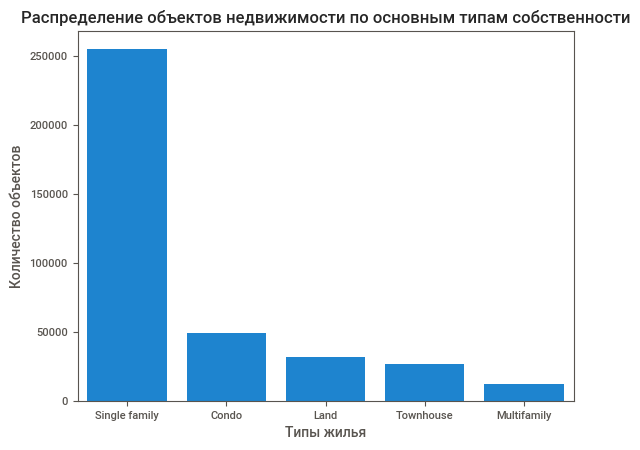

In [238]:
barplot = sns.barplot(
    data = df['propertyType'].value_counts().to_frame().reset_index(),
    y = 'count',
    x = 'propertyType'
)
barplot.set_title('Распределение объектов недвижимости по основным типам собственности')
barplot.set_xlabel('Типы жилья')
barplot.set_ylabel('Количество объектов')

### Признак stories

In [239]:
df[df['propertyType'] == 'Condo']['stories'].value_counts()

stories
1.0                       6578
2.0                       3739
9.0                       2840
3.0                       2460
High Rise (8+ Stories)    1885
                          ... 
4 Stories                    1
95                           1
77                           1
82                           1
65.0                         1
Name: count, Length: 147, dtype: int64

Приведем этажность типа condo к 4 группам этажности ('Low Rise (1-3 Stories)', 'Mid Rise (4-7 Stories)', 'High Rise (8+ Stories)', '0 Stories')

In [240]:
story_list = ['Low Rise (1-3 Stories)', 'Mid Rise (4-7 Stories)',
              'High Rise (8+ Stories)', '0 Stories']

def convert_condo_story(s: object) -> str:
    try:
        if 0 <= float(s) <=3:
            result = story_list[0]
        elif 4 <= float(s) <=7:
            result = story_list[1]
        elif 8 <= float(s):
            result = story_list[2]
        else:
            result = story_list[0]
    except:
        if s.find('Low') != -1:
            result = story_list[0]
        elif s.find('Mid') != -1:
            result = story_list[1]
        elif s.find('High') != -1:
            result = story_list[2]
        else:
            result = story_list[0]

    # Возвращаем результат
    return result

ind = df[df['propertyType'] == 'Condo'].index
df.loc[ind, 'stories'] = df.loc[ind, 'stories'].apply(lambda x: convert_condo_story(x))

In [241]:
df[df['propertyType'] == 'Condo']['stories'].value_counts()

stories
Low Rise (1-3 Stories)    38505
High Rise (8+ Stories)     7271
Mid Rise (4-7 Stories)     3294
Name: count, dtype: int64

In [242]:
story_proper_type = {
    'Single family': 'Low Rise (1-3 Stories)',
    'Multifamily': 'Low Rise (1-3 Stories)',
    'Townhouse': 'Low Rise (1-3 Stories)',
    'Condo': 'Low Rise (1-3 Stories)',
    'Land': '0 Stories'
}

for p in story_proper_type:
    if p == 'Condo':
        continue
    ind = df[df['propertyType'] == p].index
    df.loc[ind, 'stories'] = story_proper_type[p]

In [243]:
df['stories'].value_counts()

stories
Low Rise (1-3 Stories)    332177
0 Stories                  31378
High Rise (8+ Stories)      7271
Mid Rise (4-7 Stories)      3294
Name: count, dtype: int64

In [244]:
print('Пропуски в признаке stories: ', df['stories'].isna().sum())

Пропуски в признаке stories:  0


Количество пропусков сократилось с 40% до 0.

[Text(0, 0, 'Low Rise (1-3 Stories)'),
 Text(1, 0, '0 Stories'),
 Text(2, 0, 'High Rise (8+ Stories)'),
 Text(3, 0, 'Mid Rise (4-7 Stories)')]

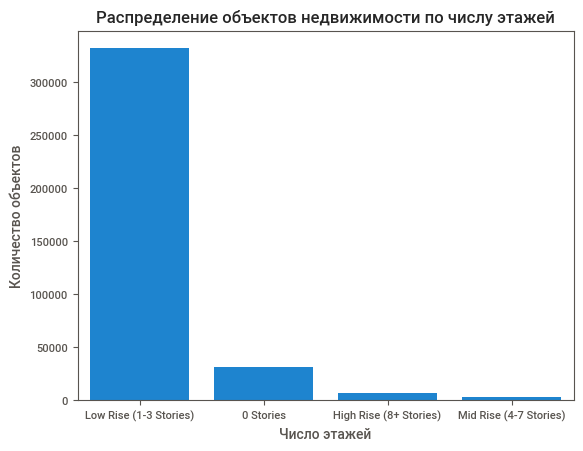

In [245]:
barplot = sns.barplot(
    data = df['stories'].value_counts().to_frame().reset_index(),
    y = 'count',
    x = 'stories'
)
barplot.set_title('Распределение объектов недвижимости по числу этажей')
barplot.set_xlabel('Число этажей')
barplot.set_ylabel('Количество объектов')
barplot.set_xticklabels(barplot.get_xticklabels())

### Признак baths 

In [246]:
df['baths'].value_counts()

baths
2 Baths          51945
3 Baths          35353
2                20413
2.0              16353
4 Baths          14711
                 ...  
32                   1
5.25 Baths           1
41.0                 1
Bathrooms: 21        1
44.0                 1
Name: count, Length: 225, dtype: int64

Здесь следуем алгоритму, если в строке есть число, то выделяем его и сохраняем в формате float, если числа нет, то NaN, если сильно большое число, как на пример 2000 или 1750, то приводим к формату 2.0 и 1.75 соответственно. Ванные комнаты кодируются дробним числом т.к. наличие той или иной функции дает отпределенное количество "балов", если в ванной не самой ванной, не есть раковина, то такая ванна не получит 1.

In [247]:
df['baths'] = df['baths'].apply(lambda b: bath_num(b))

In [248]:
df['baths'].value_counts()

baths
2.0      102598
3.0       66376
4.0       26225
1.0       17520
2.5       13674
          ...  
14.5          1
5.2           1
116.0         1
35.0          1
68.0          1
Name: count, Length: 81, dtype: int64

Посмотри на выбросы

Text(0, 0.5, '')

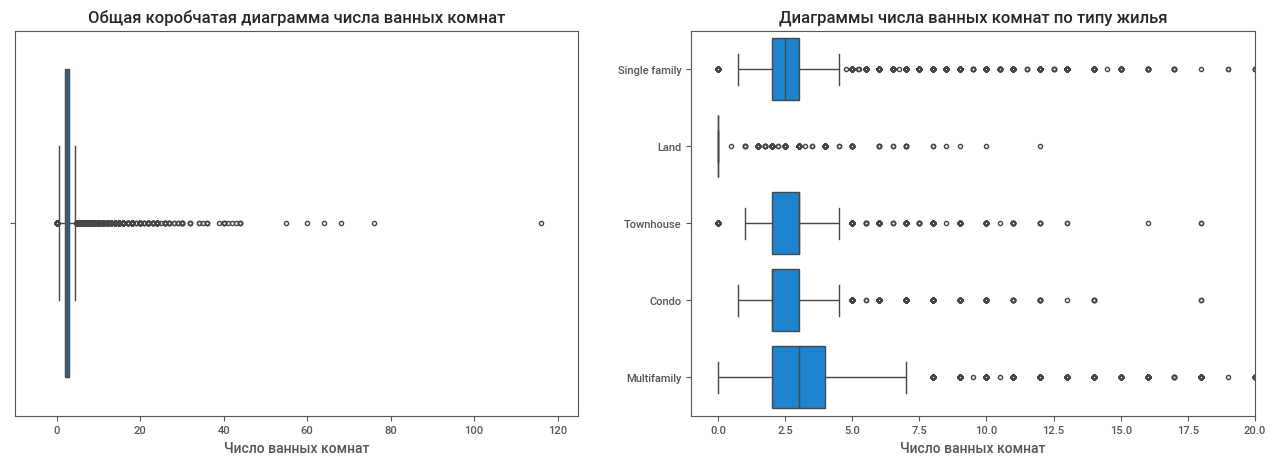

In [249]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Общую диаграмму признака
boxplot = sns.boxplot(
    data = df,
    x = 'baths',
    ax = axes[0]
)
boxplot.set(xlim=(-10,125))
boxplot.set_title('Общая коробчатая диаграмма числа ванных комнат')
boxplot.set_xlabel('Число ванных комнат')

boxplot = sns.boxplot(
    data = df,
    x = 'baths',
    y = 'propertyType',
    ax = axes[1]
)
boxplot.set(xlim=(-1,20));
boxplot.set_title('Диаграммы числа ванных комнат по типу жилья')
boxplot.set_xlabel('Число ванных комнат')
boxplot.set_ylabel('')

В данных наблюдаются значения больше нуля для пустых участков.

Возьмем верхнюю границу количества комнат в 7 (если это многосемейный дом), выделим остальные данные и удалим их.

In [250]:
df_baths = df[df['baths'] > 7].index
print(f'Свыше 7 ванных в {len(df_baths)} объектах недвижимости ({round(len(df_baths)*100/df.shape[0], 3)}%)')

df.drop(df_baths, axis=0, inplace=True)

Свыше 7 ванных в 3075 объектах недвижимости (0.822%)


Остается разобраться с пропусками, пропуски будем заполнять медианными значениями внутри типа недвижимости.

In [251]:
df_bath_med = df.groupby('propertyType')['baths'].agg('median').sort_values()

In [252]:
# выбираем по каждому типу недвижимости значения с пропусками или нулевые значения

for p in df_bath_med.index:
    mask1 = df['propertyType'] == p
    mask2 = df['baths'].isna() == True
    mask3 = df['baths'] == 0
    ind = df[mask1 & (mask2 | mask3)]['baths'].index
    df.loc[ind, 'baths'] = df_bath_med[p]

In [253]:
print('Количество пропусков в признаке baths:', df['baths'].isna().sum())

Количество пропусков в признаке baths: 0


In [254]:
df['baths'].value_counts()

baths
2.00    114069
2.50     77723
3.00     70653
0.00     30777
4.00     26225
1.00     17520
5.00      9435
3.50      6111
1.50      4324
6.00      4290
7.00      2072
1.75      1812
4.50      1552
2.25      1457
1.25      1210
2.75       998
5.50       520
6.50       191
2.10        49
1.10        13
3.10        10
3.25        10
3.75         8
4.10         3
2.20         2
3.20         2
4.25         2
0.75         2
5.25         1
5.20         1
4.75         1
0.50         1
6.75         1
Name: count, dtype: int64

### Признак city

In [255]:
# все в нижний регистр
df['city'] = df['city'].str.lower()

df['city'].unique()

array(['southern pines', 'spokane valley', 'los angeles', ...,
       'rainbow valley', 'bedford hts', 'blue springs'], dtype=object)

In [256]:
# набор данных с городом и индексом
df_zip_city = df.groupby(['zipcode', 'city'])['city'].count()
df_zip_city

zipcode  city           
--       bonsall              1
         fort lauderdale      1
0        laredo               1
         quito ecuador        1
         vacaville            1
                           ... 
99223    spokane             93
99224    spokane            127
99336    kennewick          127
99337    kennewick          154
99338    kennewick          110
Name: city, Length: 6088, dtype: int64

In [257]:
# other или '  '

ind = []
ind.extend(df[df['city'].str.contains('other') == True].index)
ind.extend(df[df['city'] == ' '].index)

In [258]:
df.loc[ind, 'city'] = df.loc[ind, ['zipcode']].applymap(lambda x: df_zip_city[x].sort_values(ascending=False).index[0]).squeeze()

In [259]:
# если город не удало подобрать, то ставим other
ind = df[df['city'].str.contains('other') == True].index
df.loc[ind, 'city'] = 'other'

In [260]:
df['city'].unique()

array(['southern pines', 'spokane valley', 'los angeles', ...,
       'rainbow valley', 'bedford hts', 'blue springs'], dtype=object)

In [261]:
df['city'].isna().sum()

0

In [262]:
# Обработка слитного написания городов с 'city'
ind = df[df['city'].str.contains(r'\wcity') == True].index

p = re.compile('(\w+)city')
df.loc[ind, 'city'] = df.loc[ind, ['city']].applymap(lambda x: p.findall(x)[0] + ' city').squeeze()

df['city'].unique()

array(['southern pines', 'spokane valley', 'los angeles', ...,
       'rainbow valley', 'bedford hts', 'blue springs'], dtype=object)

In [263]:
city_name_abb = {
    'st': ['(st\.*)\s+', 'saint '],  
    'pt': ['(pt\.*)\s+', 'port '],
    'ft': ['(ft\.*)\s+', 'fort '],  
    'mt': ['(mt\.*)\s+', 'mount '],
    'twp': ['\s+(twp\.?)', ' township']
}

for abb in city_name_abb.keys():
    if abb == 'twp':
        ind = df[df['city'].str.contains(city_name_abb[abb][0], case=False) == True].index
    else:
        ind = df[df['city'].str.match(city_name_abb[abb][0]) == True].index
    print('Заменяем', abb, 'на', city_name_abb[abb][1], '-', len(ind), 'записей')
    p = re.compile(city_name_abb[abb][0]) # создадим объект regex для поиска
    if abb == 'twp':
        df.loc[ind, 'city'] = df.loc[ind, ['city']].applymap(lambda x: x[:p.search(x).start()] + city_name_abb[abb][1]).squeeze()
    else:
        df.loc[ind, 'city'] = df.loc[ind, ['city']].applymap(lambda x: city_name_abb[abb][1] + x[p.match(x).end():]).squeeze()

Заменяем st на saint  - 1665 записей
Заменяем pt на port  - 242 записей
Заменяем ft на fort  - 32 записей
Заменяем mt на mount  - 4 записей
Заменяем twp на  township - 50 записей


In [264]:
# еще чуть-чуть ручной обработки

df.loc[df[df['city'] == 'new york city'].index, 'city'] = 'new york'
df.loc[df[df['city'] == 'e. new york'].index, 'city'] = 'brooklyn'
df.loc[df[df['city'] == 'point charlotte'].index, 'city'] = 'port charlotte'
df.loc[df[df['city'] == 'p c beach'].index, 'city'] = 'panama city beach'
df.loc[df[df['city'] == 'west panama city beach'].index, 'city'] = 'panama city beach'
df.loc[df[df['city'] == 'city beach'].index, 'city'] = 'panama city beach'
df.loc[df[df['city'] == 'piney pt village'].index, 'city'] = 'piney point village'
df.loc[df[df['city'] == 'city center'].index, 'city'] = 'las vegas'
df.loc[df[df['city'] == 'pete beach'].index, 'city'] = 'saint pete beach'
df.loc[df[df['city'] == 'atlaanta'].index, 'city'] = 'atlanta'
df.loc[df[df['city'] == 'n miami beach'].index, 'city'] = 'miami beach'


In [265]:
df.drop('zipcode', axis=1, inplace=True)

In [266]:
df['city'].unique()

array(['southern pines', 'spokane valley', 'los angeles', ...,
       'rainbow valley', 'bedford hts', 'blue springs'], dtype=object)

### Признак sqft

In [267]:
# переводим ч числовой формат

df['sqft'] = df['sqft'].str.replace(',', '')

df['sqft'] = df['sqft'].apply(sqft_num).astype(float)

ind = df[df['sqft'] == 0].index
df.loc[ind, 'sqft'] = np.NaN

df['sqft'].unique()

array([2900., 1947., 3000., ..., 5789., 6193., 6955.])

### Признак beds  

In [268]:
df['beds'] = df['beds'].apply(beds_num)

In [269]:
df['beds'].value_counts()

beds
3.0      104875
4.0       68396
2.0       49765
5.0       21122
1.0        6395
6.0        5793
0.0        2275
7.0        1368
8.0         935
9.0         372
10.0        192
12.0        114
11.0         82
64.0         44
13.0         24
15.0         20
16.0         19
14.0         14
20.0          9
18.0          9
23.0          6
17.0          5
24.0          3
34.0          2
21.0          2
22.0          2
63.0          1
51.0          1
70.0          1
100.0         1
123.0         1
42.0          1
19.0          1
27.0          1
58.0          1
144.0         1
47.0          1
26.0          1
33.0          1
30.0          1
31.0          1
44.0          1
25.0          1
Name: count, dtype: int64

Text(0.5, 0, 'Число спальных комнат')

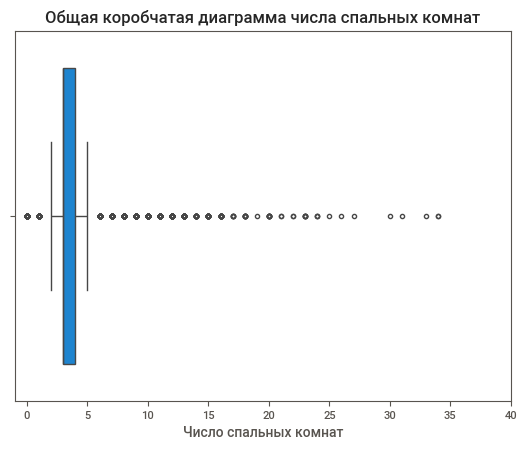

In [270]:
boxplot = sns.boxplot(
    data = df,
    x = 'beds'
)
boxplot.set(xlim=(-1,40))
boxplot.set_title('Общая коробчатая диаграмма числа спальных комнат')
boxplot.set_xlabel('Число спальных комнат')

Посмотрим на выбросы

In [271]:
# Установим уровень значимости и подготовим сообщения о результатах
alpha = 0.05
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# Проведем тест для признака спальных комнат
_, p = shapiro(df['beds'])
print('Результаты теста Шапиро-Уилка')
print('p = %.3f' % p)

# Интерпретируем результаты
if p > alpha:
	print(H0)
else:
	print(Ha)

Результаты теста Шапиро-Уилка
p = 1.000
Данные распределены нормально


In [272]:
outliers, cleaned = outliers_iqr(df, 'beds')

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print('Процент выбросов в исходном датафрейме: {:2.2%}'.format(outliers.shape[0]/df.shape[0]))
display('ТОП-5 по количеству спален среди выбросов:', outliers['beds'].value_counts().nlargest(5))

Число выбросов по методу Тьюки: 17702
Результирующее число записей: 244158
Процент выбросов в исходном датафрейме: 4.77%


'ТОП-5 по количеству спален среди выбросов:'

beds
1.0    6395
6.0    5793
0.0    2275
7.0    1368
8.0     935
Name: count, dtype: int64

Научные методы это хорошо, но будем рассуждать логически, количество спален должно быть больше чес количество ванных комнат, посчитаем это усредненное соотношение. 

In [273]:
(df.beds / df.baths).median()

1.25

Определеим 0 как нижнюю границу выбросов, и 7 * 1.25 = 8.75 = 9 спален для верхней границы.

In [274]:
df_beds_9 = df[df['beds'] > 9].index
print(f'9 спален в {len(df_beds_9)} объектах ({round(len(df_beds_9)*100/df.shape[0], 3)}%)')

df.drop(df_beds_9, axis=0, inplace=True)

9 спален в 564 объектах (0.152%)


In [275]:
# избавимся от пропусков, заменять будем или на медиану, или на количество ванных умноженных на коэффициент

proper_bed_med = df.groupby('propertyType')['beds'].agg('median').sort_values()

for p in proper_bed_med.index:
    mask1 = df['propertyType'] == p # тип недвижимости
    mask2 = df['beds'].isna() == True # пропускам в beds
    mask3 = df['beds'] == 0 # нули в beds
    ind = df[mask1 & (mask2 | mask3)]['beds'].index
    coef = (df[mask1].beds / df[mask1].baths).median()
    df.loc[ind, 'beds'] = df.loc[ind, 'beds'].apply(lambda x: max(proper_bed_med[p], x*coef))


In [276]:
df['beds'].isna().sum()

0

### Признак state  

In [277]:
# Заменим неверные аббревиатуры шатов
df.loc[df[df['state'] == 'Fl'].index, 'state'] = 'FL'
df.loc[df[df['state'] == 'DC'].index, 'state'] = 'WA'

# По остальным сохраним индекс и удалим записи по индексам
ind = []
ind.extend(df[df['state'] == 'BA'].index)
ind.extend(df[df['state'] == 'OS'].index)
ind.extend(df[df['state'] == 'OT'].index)
df.drop(ind, axis=0, inplace=True)

### Признак target

In [278]:
# ручная чистка
df['target'] = df['target'].str.replace('$', '', regex=False)
df['target'] = df['target'].str.replace(',', '', regex=False)
df['target'] = df['target'].str.replace('+', '', regex=False).astype(int)

Text(0, 0.5, 'Типы недвижимости')

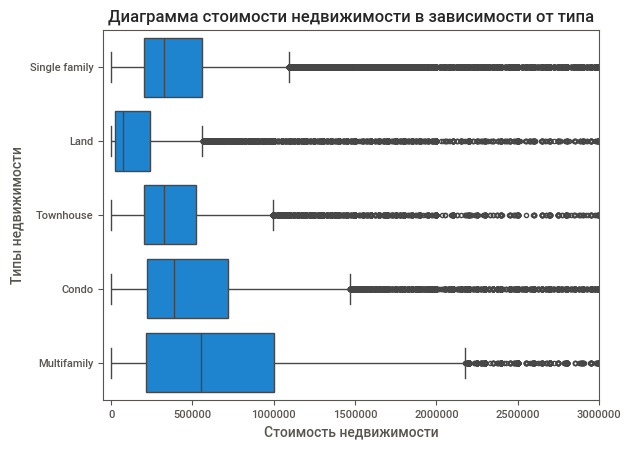

In [279]:
boxplot = sns.boxplot(
    data = df,
    x = 'target',
    y = 'propertyType'
)
boxplot.set(xlim=(-50_000,3_000_000))
boxplot.set_title('Диаграмма стоимости недвижимости в зависимости от типа')
boxplot.set_xlabel('Стоимость недвижимости')
boxplot.set_ylabel('Типы недвижимости')

Распределение данных далеко от нормального, попробуем их прологорифмировать

Text(0, 0.5, 'Количество объявлений о продаже')

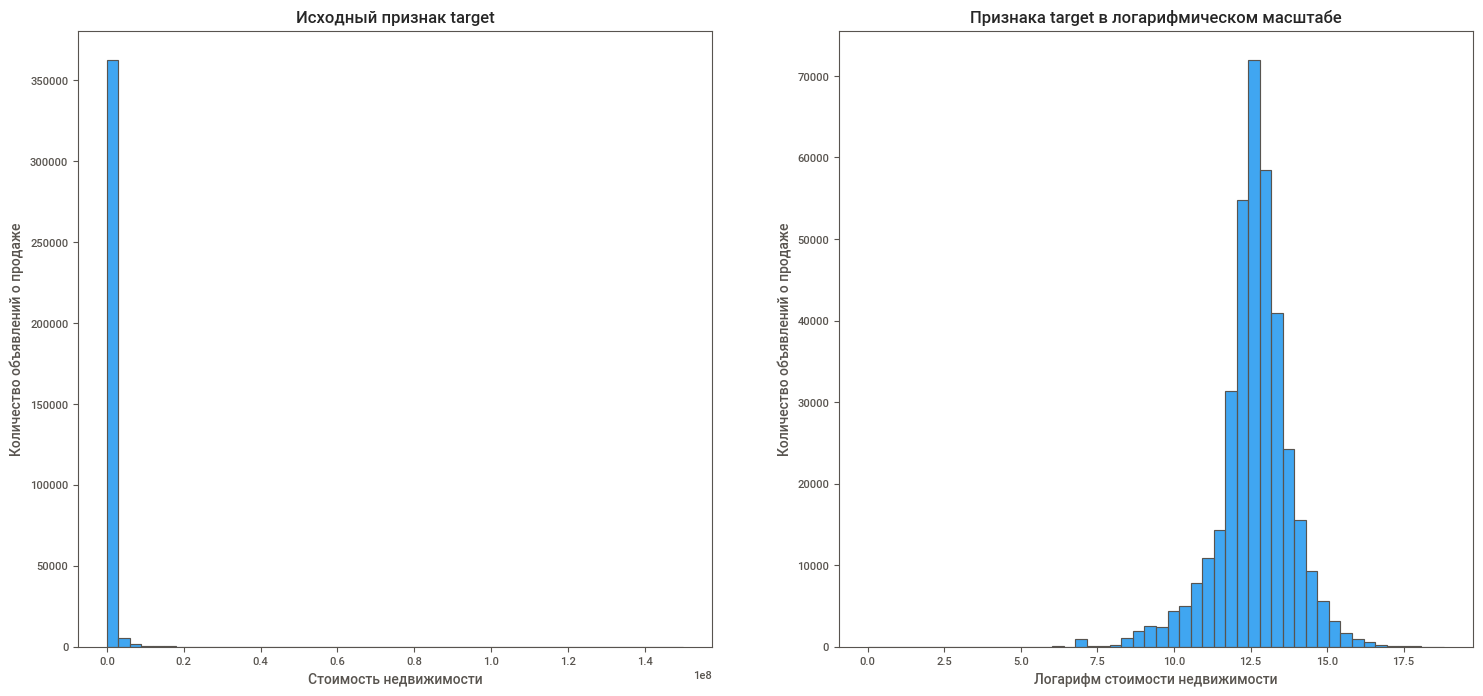

In [280]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

histplot = sns.histplot(
    data = df['target'],
    bins = 50,
    ax = axes[0]
)
histplot.set_title('Исходный признак target')
histplot.set_xlabel('Стоимость недвижимости')
histplot.set_ylabel('Количество объявлений о продаже')

log_target = np.log(df['target'])
histplot = sns.histplot(
    data = log_target,
    bins=50,
    ax=axes[1]
)
histplot.set_title('Признака target в логарифмическом масштабе')
histplot.set_xlabel('Логарифм стоимости недвижимости')
histplot.set_ylabel('Количество объявлений о продаже')

Для выявления выбросов воспользуемся методом z-отклонений (трех сигм).

In [281]:
property_list = list(df['propertyType'].unique())
boundaries = [(2,2), (2,2), (2,2), (2,2), (2,2)] # границы метода z-отклонений для них
prop_bound = dict(zip(property_list, boundaries))

hist_colors = ['blue', 'orange', 'green', 'red', 'purple']

df['outliers'] = 0

for i, p_type in enumerate(prop_bound):
    outliers, cleaned = outliers_z_score(df = df[df['propertyType'] == p_type],
                                         feature = 'target',
                                         log_scale = True,
                                         left = prop_bound[p_type][0],
                                         right = prop_bound[p_type][1])

    print(f'Число выбросов по методу z-отклонений для {p_type}: {outliers.shape[0]}')
    print(f'Результирующее число записей для {p_type}: {cleaned.shape[0]}\n')
    df.loc[outliers.index, 'outliers'] = 1

print(f'Всего по методу z-отклонений выявлено {df.outliers.sum()} выбросов.')

Число выбросов по методу z-отклонений для Single family: 14394
Результирующее число записей для Single family: 238289

Число выбросов по методу z-отклонений для Land: 985
Результирующее число записей для Land: 30333

Число выбросов по методу z-отклонений для Townhouse: 1278
Результирующее число записей для Townhouse: 24945

Число выбросов по методу z-отклонений для Condo: 2343
Результирующее число записей для Condo: 46606

Число выбросов по методу z-отклонений для Multifamily: 523
Результирующее число записей для Multifamily: 10782

Всего по методу z-отклонений выявлено 19523 выбросов.


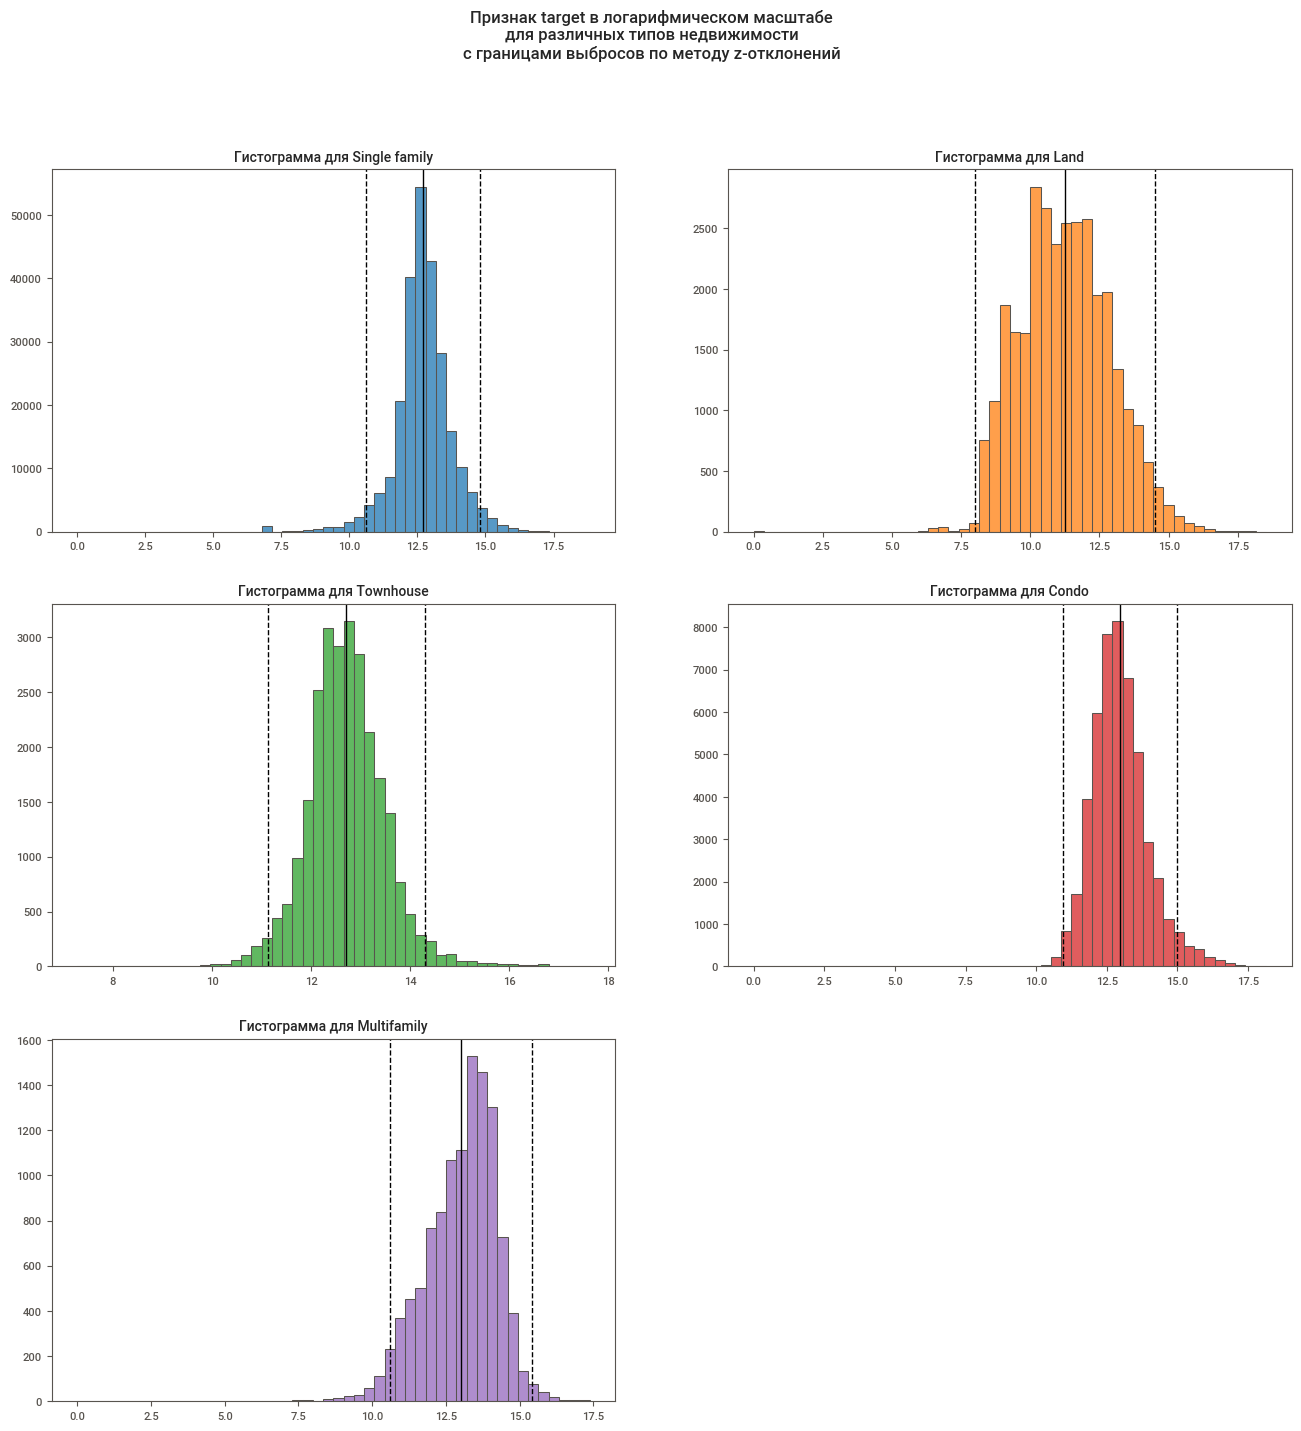

In [282]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
fig.suptitle('Признак target в логарифмическом масштабе\n'+\
             'для различных типов недвижимости\n'+\
             'с границами выбросов по методу z-отклонений', fontsize=12);

for i, p_type in enumerate(prop_bound):
    if df[df['propertyType'] == p_type]['target'].min() > 0:
        log_target = np.log(df[df['propertyType'] == p_type]['target'])
    else:
        log_target = np.log(df[df['propertyType'] == p_type]['target']+1)

    upper_bound = log_target.mean() + prop_bound[p_type][1] * log_target.std()
    lower_bound = log_target.mean() - prop_bound[p_type][0] * log_target.std()

    histplot = sns.histplot(
        data = log_target,
        bins = 50,
        ax = axes[divmod(i, 2)],
        color = 'tab:' + hist_colors[i]
    )
    histplot.axvline(log_target.mean(), color='k', lw=1)
    histplot.axvline(upper_bound, color='k', ls='--', lw=1)
    histplot.axvline(lower_bound, color='k', ls='--', lw=1)
    histplot.set_title(f'Гистограмма для {p_type}', fontsize=10)
    histplot.set_xlabel('')
    histplot.set_ylabel('')
fig.delaxes(axes[2, 1])

## Базовое решение задачи предсказания

Построим простую модель обратной регрессии, что бы на основе полученных результатах видеть прогресс от дальнейшей обработки данных.
Так же с теми же целями востользуемся моделью CatBoostRegressor от Яндекса с параметрами по умолчанию.

Для оценки качества моделирования будут использоваться три метрики качества:  
- **MAE** - среднюю абсолютную ошибку, чтобы понимать, на сколько тысяч долларов ошиблась модель,
- **MAPE** - среднюю абсолютную ошибку в процентах поскольку стоимость жилья - вещь относительная,    
- **R2** - коэффициент детерминации, чтобы понимать, насколько хорошо модель улавливает закономерности - целевая метрика.    

In [283]:
# Убирает не обработанные еще признаки
df_baseline = df.drop(['street', 'homeFacts', 'city', 'schools'], axis=1)

# Убираем не обработанные пропуски
df_baseline = df_baseline.dropna()

# Убираем выбросы в целевом признаке
ind = df_baseline[df_baseline['outliers'] == 1].index
df_baseline = df_baseline.drop(ind, axis=0)

In [284]:
oh_cols = ['status', 'propertyType', 'stories']

encoder = ce.OneHotEncoder(cols=oh_cols, use_cat_names=True)
encoded_data = encoder.fit_transform(df_baseline[oh_cols])
df_baseline = pd.concat([df_baseline, encoded_data], axis=1)

encoder = ce.BinaryEncoder(cols=['state'])
encoded_data = encoder.fit_transform(df_baseline[['state']])
df_baseline = pd.concat([df_baseline, encoded_data], axis=1)

df_baseline = df_baseline.drop(['status', 'propertyType', 'stories', 'state'], axis=1)
df_baseline.shape

(305224, 25)

In [285]:
X = df_baseline.drop('target', axis=1)
y = df_baseline['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(213656, 24) (91568, 24) (213656,) (91568,)


In [286]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

MAE на тренировочоной выборке: 247258.86
MAPE на тренировочной выборке: 84.0
r2 на тренировочоной выборке: 0.25

MAE на тестовой выборке: 249289.59
MAPE на тестовой выборке: 84.66
r2 на тестовой выборке: 0.25


In [287]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test)

model = CatBoostRegressor(random_state = 42,
                          verbose = False)

model.fit(train_pool)

y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

MAE на тренировочоной выборке: 168657.17
MAPE на тренировочной выборке: 50.34
r2 на тренировочоной выборке: 0.59

MAE на тестовой выборке: 173424.25
MAPE на тестовой выборке: 51.65
r2 на тестовой выборке: 0.57


**Выводы по baseline-решению:**
  
Простая модель линейной регрессии показала крайне неудовлетворительные результаты: ошибка в 250 тыс. Это означает, что модель не уловила закономерностей в данных.

Продвинутая модель CatBoostRegressor показала гораздо лучшие результаты даже на таких плохо обработанных данных: ошибка в 173 тыс. Это говорит о качестве модели, способной с базовыми настройками улавливать связи в данных.

Переходим к анализу данных. 

## Разведывательный анализ данных

### Признак homeFacts  

In [288]:
df['homeFacts'].head()

0    {'atAGlanceFacts': [{'factValue': '2019', 'fac...
1    {'atAGlanceFacts': [{'factValue': '2019', 'fac...
2    {'atAGlanceFacts': [{'factValue': '1961', 'fac...
4    {'atAGlanceFacts': [{'factValue': '', 'factLab...
5    {'atAGlanceFacts': [{'factValue': '1920', 'fac...
Name: homeFacts, dtype: object

Признак содержит сериализованныый словарь с полями:
- Year built - год постройки,  
- Remodeled year - год обновления,  
- Heating - вид отопления,  
- Cooling - вид охлаждения,  
- Parking - наличие парковки,  
- lotsize - размер участка,  
- Price/sqft - цена за квадратный фут. 

Преобразуем этот признак в 7 новых признаков.

In [289]:
def deserialize_home(s):
    result = eval(s)['atAGlanceFacts']
    return pd.Series([r['factValue'] for r in result])

In [290]:
df[['yearBuilt', 'remodeledYear', 'heating', 'cooling','parking', 'lotsize', 'price_sqft']] = df['homeFacts'].apply(deserialize_home)

In [291]:
missing_data = df[['yearBuilt', 'remodeledYear', 'heating', 'cooling','parking', 'lotsize', 'price_sqft']].isnull().sum()

for column_name, missing_count in missing_data.items():
    if missing_count > 0:
        percentage = (missing_count / len(df)) * 100
        print(f'{column_name}: {missing_count} пропусков ({percentage:.2f}% от общего числа данных в столбце)')

yearBuilt: 3495 пропусков (0.94% от общего числа данных в столбце)
remodeledYear: 25979 пропусков (7.01% от общего числа данных в столбце)
heating: 3422 пропусков (0.92% от общего числа данных в столбце)
cooling: 3422 пропусков (0.92% от общего числа данных в столбце)
parking: 3422 пропусков (0.92% от общего числа данных в столбце)
lotsize: 27940 пропусков (7.54% от общего числа данных в столбце)
price_sqft: 56483 пропусков (15.25% от общего числа данных в столбце)


В новых признаках наблюдаются пропуски, будем обрабатывать.

### Признаки yearBuilt и remodeledYear  

Из этих двух признаков можно получить возраст объекта недвижимости, но в обоих этих признаках есть пропуски в данных, по этому объединимданные из двух признаком, взяв более поздюю дату.

In [292]:
yb_na = df['yearBuilt'].isna().sum()
yb_na += df[df['yearBuilt'] == ''].shape[0]
yb_na_share = round(yb_na / df.shape[0] * 100, 2)

yr_na = df['remodeledYear'].isna().sum()
yr_na += df[df['remodeledYear'] == ''].shape[0]
yr_na_share = round(yr_na / df.shape[0] * 100, 2)

print(f'Количество пустых значений в yearBuilt - {yb_na}, что составляет {yb_na_share}%.')
print(f'Количество пустых значений в remodeledYear - {yr_na}, что составляет {yr_na_share}%.')

Количество пустых значений в yearBuilt - 61745, что составляет 16.67%.
Количество пустых значений в remodeledYear - 222321, что составляет 60.01%.


In [293]:
df['lastYear'] = df[['yearBuilt', 'remodeledYear']].apply(lambda x: year_compare(*x), axis=1)

Посмотрим на полученные данные

[(1920.0, 2020.0)]

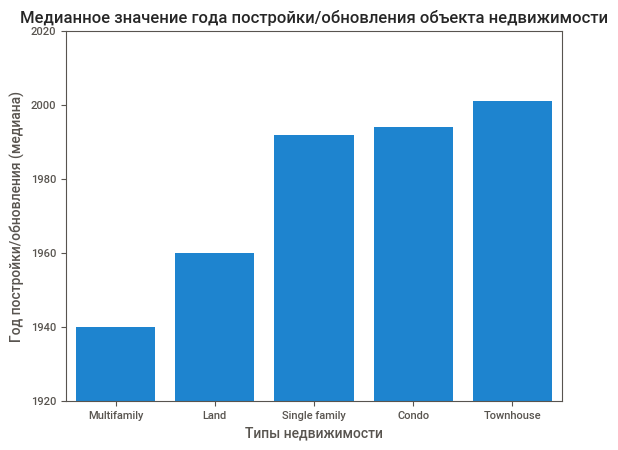

In [294]:
proper_year_med = df.groupby('propertyType')['lastYear'].median().sort_values()

# Отобразим медианы в виде диаграммы
barplot = sns.barplot(
    data = proper_year_med.to_frame().reset_index(),
    y = 'lastYear',
    x = 'propertyType'
)
barplot.set_title('Медианное значение года постройки/обновления объекта недвижимости')
barplot.set_xlabel('Типы недвижимости')
barplot.set_ylabel('Год постройки/обновления (медиана)')
barplot.set_xticklabels(barplot.get_xticklabels())
barplot.set(ylim=(1920,2020))

Самые старые объекты это многосемейные дома.

Сформируем новый признак - age возраст объекта недвижимости, оставшиеся пропуски в lastYear заполним медианой согласно типу объекта.

In [295]:
for p in proper_year_med.index:
    mask1 = df['propertyType'] == p # тип недвижимости
    mask2 = df['lastYear'].isna() == True # пропуски в lastYear
    ind = df[mask1 & mask2]['lastYear'].index
    df.loc[ind, 'lastYear'] = proper_year_med[p]

df['lastYear'] = df['lastYear'].astype(int)

Посмотрим на выбросы

Text(0, 0.5, 'Типы недвижимости')

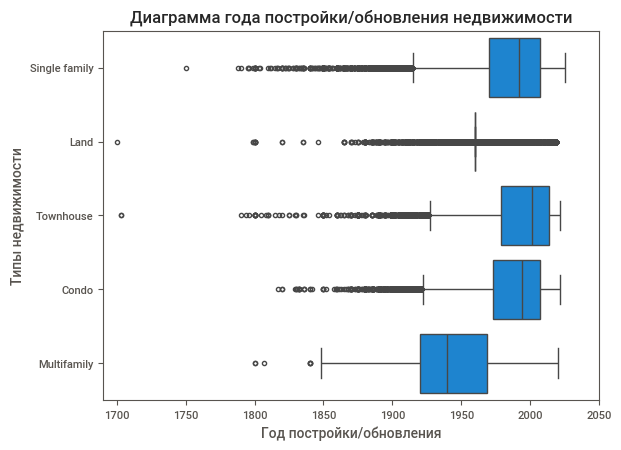

In [296]:
# Построим коробчатую диаграмму признака lastYear
boxplot = sns.boxplot(
    data = df,
    x = 'lastYear',
    y = 'propertyType'
)
boxplot.set(xlim=(1690,2050))
boxplot.set_title('Диаграмма года постройки/обновления недвижимости')
boxplot.set_xlabel('Год постройки/обновления')
boxplot.set_ylabel('Типы недвижимости')

Подведем черту на нижней границе выбросов в 1700 году, а верхнюю границу на 2022 году, выбросы заменим медианным значением.

In [297]:
for p in proper_year_med.index:
    mask1 = df['propertyType'] == p
    mask2 = (df['lastYear'] < 1700) | (df['lastYear'] > 2022)
    ind = df[mask1 & mask2]['lastYear'].index 
    df.loc[ind, 'lastYear'] = proper_year_med[p]

df['age'] = 2023 - df['lastYear']

df.drop(['yearBuilt', 'remodeledYear', 'lastYear'], axis=1, inplace=True)

### Признаки heating, cooling и parking  

Смотрим пропуски

In [298]:
hcp_list = ['heating', 'cooling', 'parking']

for f in hcp_list:
  print(f'В признаке {f} найдено {df[f].isna().sum()} пропуска, это {round(df[f].isna().sum()/df.shape[0]*100, 2)}%.')

В признаке heating найдено 3422 пропуска, это 0.92%.
В признаке cooling найдено 3422 пропуска, это 0.92%.
В признаке parking найдено 3422 пропуска, это 0.92%.


Посмотрим на значения.

In [299]:
df['heating'].value_counts()

heating
                                                                103943
Forced Air                                                       81416
Forced air                                                       50466
Other                                                            28707
Electric                                                         10092
                                                                 ...  
Wood Stove                                                           1
Electric, Oil, Propane                                               1
Electric, Exhaust Fans, Heat Pump                                    1
Central, Zoned, Forced Air, Fireplace(s)                             1
Baseboard, Hot Water, Programmable Thermostat, Radiant Floor         1
Name: count, Length: 1944, dtype: int64

In [300]:
df['cooling'].value_counts()

cooling
Central                                                                        155635
                                                                               118153
Central Air                                                                     14300
No Data                                                                         10313
Has Cooling                                                                      9729
                                                                                ...  
Central Air, g-Energy Star HVAC, Gas Hot Air/Furnace, Multizone A/C                 1
g-Fresh Air Ventilation, Gas Hot Air/Furnace, Heat Pump - AC, Multizone A/C         1
3+ Units, Other Heating (See Remarks)                                               1
Ductless/Mini-Split, Ceiling Fan(s)                                                 1
Central A/C (Gas), Central Heat (Gas), Heat Pump                                    1
Name: count, Length: 1430, dtype: int64

In [301]:
df['parking'].value_counts()

parking
                                                                                                                                    169666
Attached Garage                                                                                                                      69312
2 spaces                                                                                                                             27757
1 space                                                                                                                              14069
Detached Garage                                                                                                                      12939
                                                                                                                                     ...  
Assigned, Parking Space Conveys, Paved Parking, Private, Parking Lot, On Street                                                          1
Boat, Driveway, Gar

Данных очень много, много похожих значений, много значений с одинаковым смыслом.

Приведем значения в этих трех признаках к прем значениям yes (есть парковка|кондиционер|отопление), no и missing (данные отсутствуют)

In [302]:
for f in hcp_list:
    df[f] = df[f].apply(three_state_feat)

for f in hcp_list:
    mis = df[df[f] == 'missing'].shape[0]
    print(f'В признаке {f} найдено {mis} отсутствующих значений, {round(mis/df.shape[0]*100,2)}%.')

В признаке heating найдено 11743 отсутствующих значений, 3.17%.
В признаке cooling найдено 13735 отсутствующих значений, 3.71%.
В признаке parking найдено 16310 отсутствующих значений, 4.4%.


Попробуем избавиться от пропусков в данных, для этого выдвинем теорию, что в штатах с холодным климатом больше домов с отоплением, а в жарких штатах дольше домов с кондиционером.

В ходе подтверждения теории будем использовать набор данных `average_annual_temp.csv`, который содержит наименование штата, среднегодовую температуру в градусах Фарингейта и Цельсия, а так же ранк (чем он ниже, тем более теплее штат, и на оборот).

Т.к. в нашем наборе данных штату указаны в виде аббревиатур, то возьмем еще один набор данных `us_states.csv`, он содержит наименование штата, его аббревиатуру, столицу и "народное название".

In [303]:
df_tmp1 = pd.read_csv('data/average_annual_temp.csv', delimiter=';')
df_tmp1.head()

state_name  temp_f  temp_c  rank
0     Alabama    62.8    17.1     7
1      Alaska    26.6    -3.0    50
2     Arizona    60.3    15.7    10
3    Arkansas    60.4    15.8     9
4  California    59.4    15.2    12

In [304]:
df_tmp2 = pd.read_csv('data/us_states.csv', delimiter=';')
df_tmp2.head()

state_name state      capital  \
0     Alabama    AL   Montgomery   
1      Alaska    AK       Juneau   
2     Arizona    AZ      Phoenix   
3    Arkansas    AR  Little Rock   
4  California    CA   Sacramento   

                                            nickname  
0  Yellowhammer State, Heart of Dixie, Camellia S...  
1                                  The Last Frontier  
2                   Grand Canyon State, Copper State  
3  The Natural State, Land of Opportunity, The Ra...  
4                                       Golden State

In [305]:
df_temp = pd.merge(df_tmp1, df_tmp2, on='state_name')
df_temp.head()

state_name  temp_f  temp_c  rank state      capital  \
0     Alabama    62.8    17.1     7    AL   Montgomery   
1      Alaska    26.6    -3.0    50    AK       Juneau   
2     Arizona    60.3    15.7    10    AZ      Phoenix   
3    Arkansas    60.4    15.8     9    AR  Little Rock   
4  California    59.4    15.2    12    CA   Sacramento   

                                            nickname  
0  Yellowhammer State, Heart of Dixie, Camellia S...  
1                                  The Last Frontier  
2                   Grand Canyon State, Copper State  
3  The Natural State, Land of Opportunity, The Ra...  
4                                       Golden State

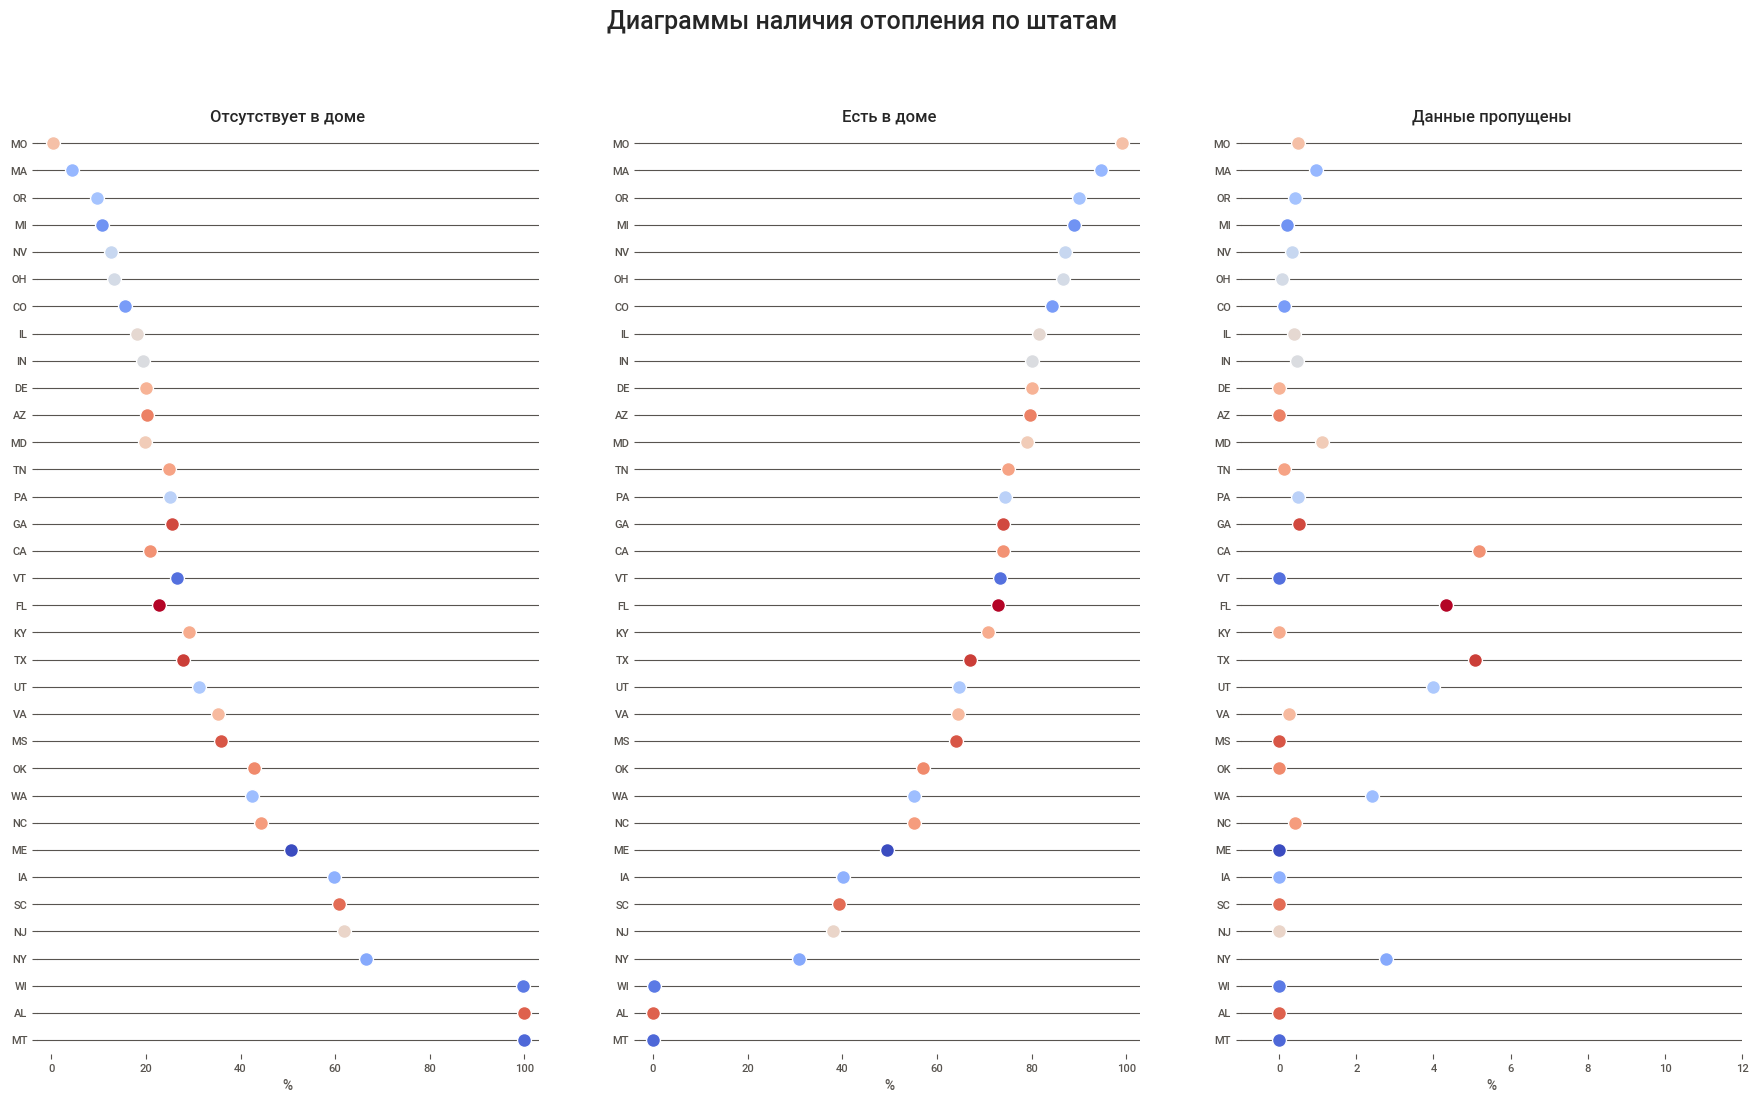

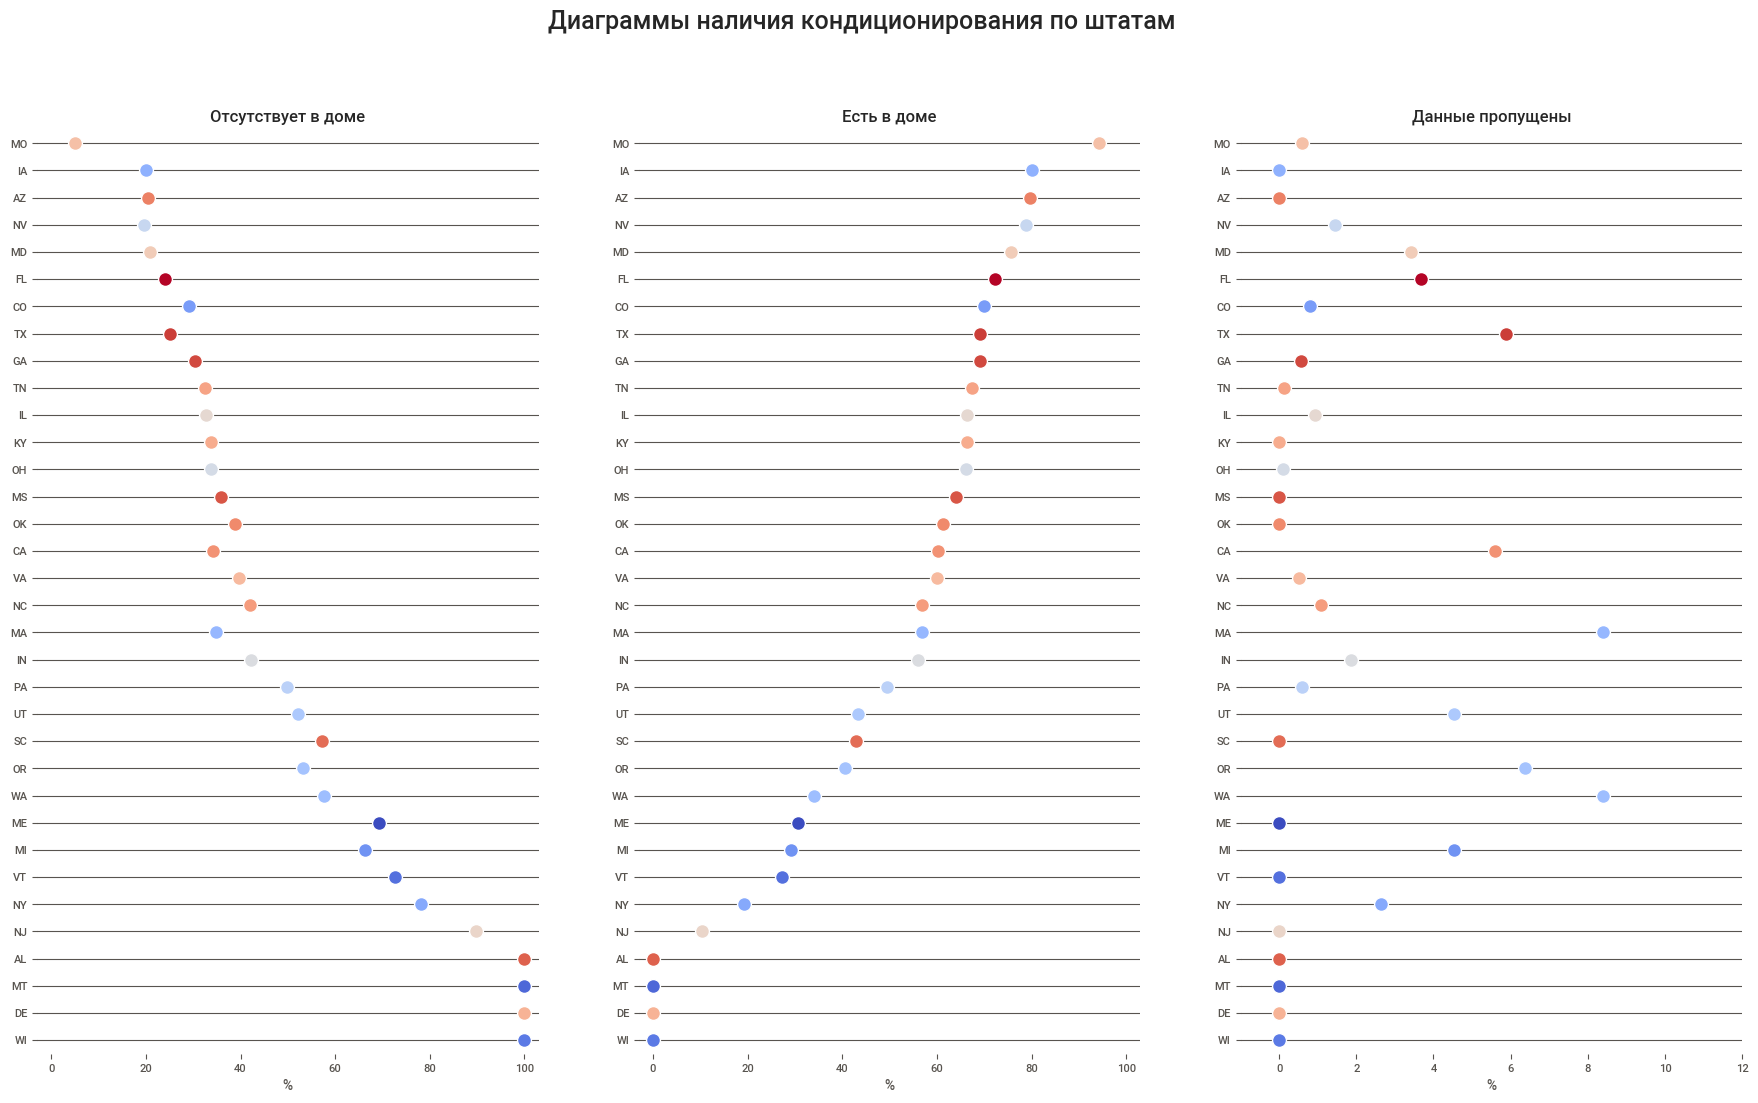

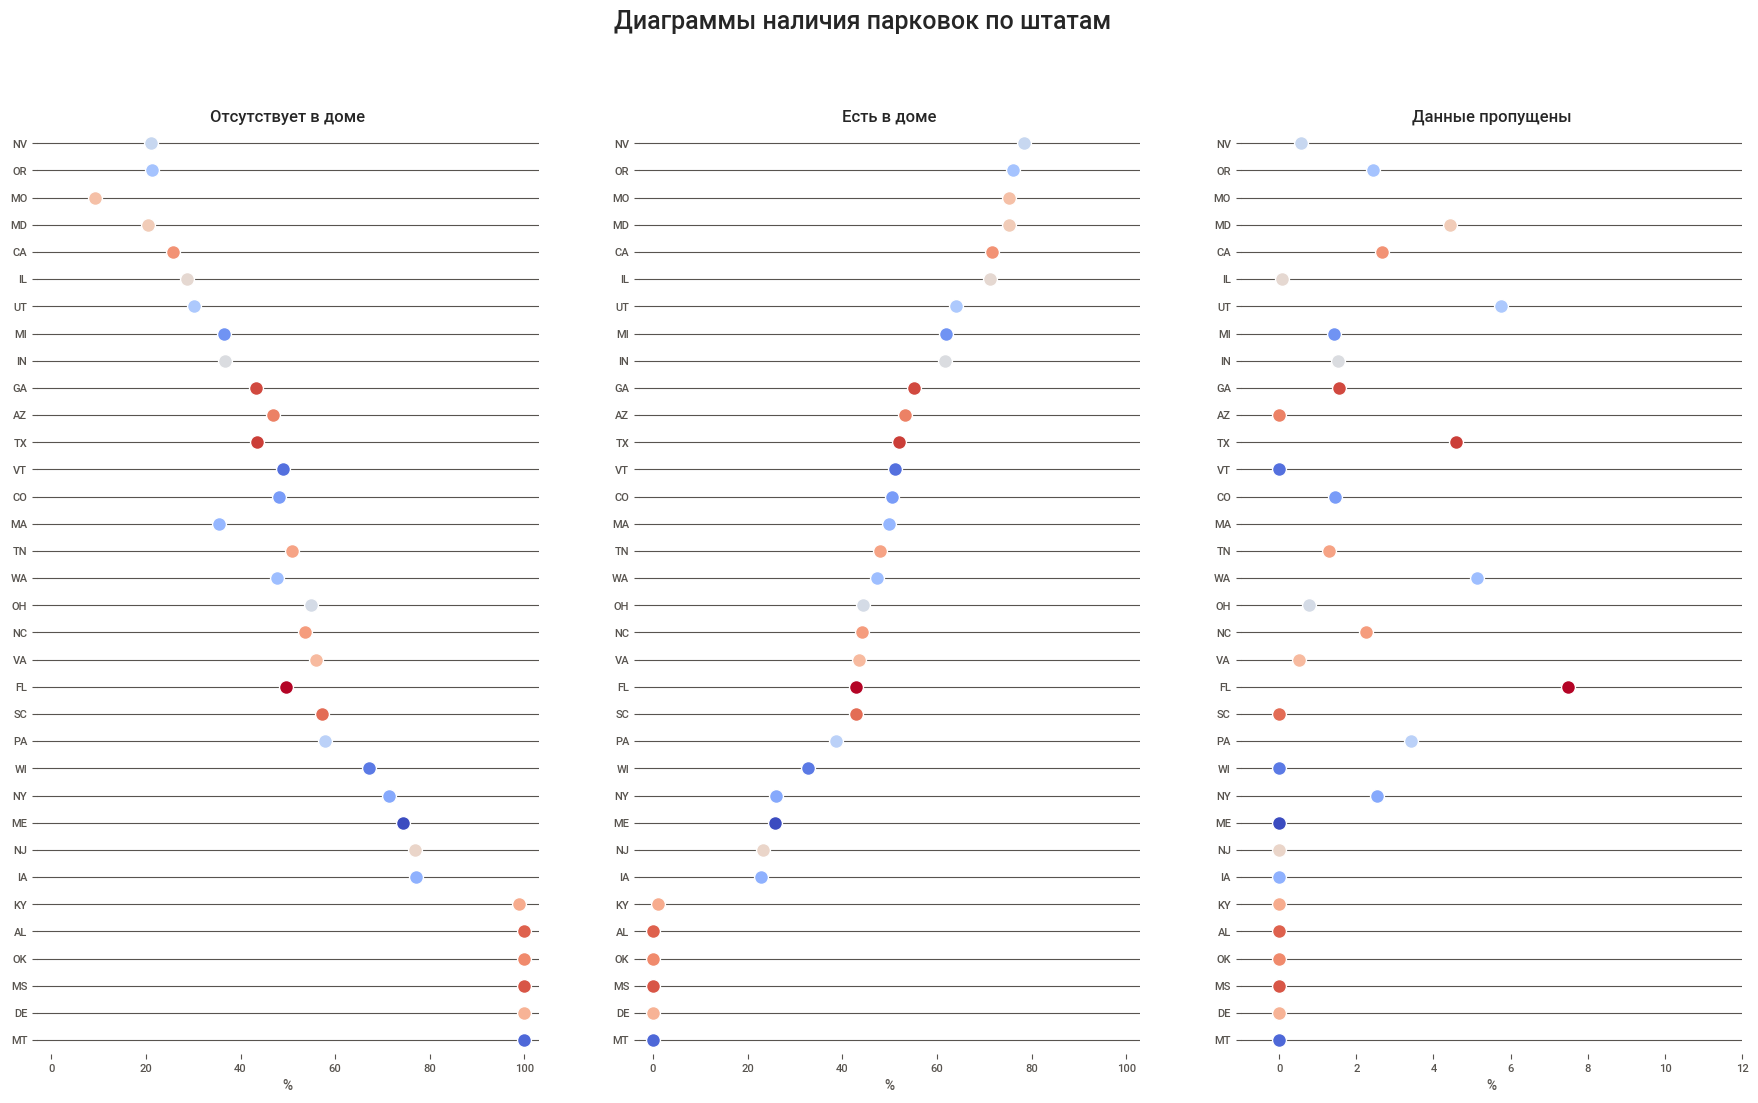

In [306]:
for prop in hcp_list:
    df_cross = pd.crosstab(
        index = df['state'],
        columns = df[prop],
        normalize = 'index'
    ).sort_values(by='Yes', ascending=False)*100

    df_cross = pd.merge(df_cross, df_temp[['state', 'state_name', 'temp_c', 'rank']], on='state')
    
    word = {'heating': 'отопления',
            'cooling': 'кондиционирования',
            'parking': 'парковок'}
    
    subtitle = {0: 'Отсутствует в доме',
                1: 'Есть в доме',
                2: 'Данные пропущены'}
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 12))
    fig.suptitle(f'Диаграммы наличия {word[prop]} по штатам', fontsize=18)
    
    for i, c in enumerate(df_cross.columns[1:4]):
        stripplot = sns.stripplot(
            data = df_cross,
            x = c,
            y = df_cross.state,
            hue = 'rank',
            palette = 'coolwarm_r',
            size = 10,
            linewidth = 1,
            edgecolor = 'w',
            orient = 'h',
            ax = axes[i],
            legend = False
        )
        stripplot.set(xlim=(-3, 103), xlabel='%', ylabel='', title = subtitle[i])
        if i == 2:
            stripplot.set(xlim=(-1, 12))
        stripplot.xaxis.grid(False)
        stripplot.yaxis.grid(True)
    sns.despine(fig, left=True, bottom=True)

Тепловая характеристика задана цветом меток.

**Отопление.**

Идеальное подтверждение теории о том, что в холодных штатах в домах установлено отопление, в теплых на оборот. Графически это должно было выглядеть на диаграмме "есть" - красные точки в левой части, синие в правой, для диаграммы "нет" расположение должно быть обратным.

Теория подтверждается частично, т.к. исходя из диаграммы можно сделать вывод, что и в теплых штатах система отопления устанавливается.

**Кондиционирование.**

Тут картина более явная, на диаграмме "есть" в интервале 60-80% расположены теплые штаты.

**Парковка.**

Тут нет явной зависимости от температуры. 

Для заполнения пропусков в признаках отопления и кондиционирования будем брать медиану стоимости жилья (ведь установка системы отопления или кондиционирования сказывается на стоимости) по штату и типу недвижимости, какая преобладает, то так и будем заполнять признак.

Для заполнения пропусков в признаке парковки будем брать медиану стоимости по городу (т.к. количество парковочных мест в маленьком городе гораздо более верояно, чем в большом) и типу недвижимости.

In [307]:
state_heat_gr = df.groupby(['state', 'propertyType', 'heating'])['target'].median()
state_cool_gr = df.groupby(['state', 'propertyType', 'cooling'])['target'].median()

ind_heat = df[df['heating'] == 'missing'].index
ind_cool = df[df['cooling'] == 'missing'].index

df.loc[ind_heat, 'heating'] = df.loc[ind_heat, ['state', 'propertyType', 'target']].apply(lambda x: fill_heat_cool(*x, state_heat_gr), axis=1)

df.loc[ind_cool, 'cooling'] = df.loc[ind_cool, ['state', 'propertyType', 'target']].apply(lambda x: fill_heat_cool(*x, state_cool_gr), axis=1)

print('Количество пропусков в признаке heating:', df['heating'].isna().sum() + df[df['heating'] == 'missing'].shape[0])
print('Количество пропусков в признаке cooling:', df['cooling'].isna().sum() + df[df['cooling'] == 'missing'].shape[0])

Количество пропусков в признаке heating: 0
Количество пропусков в признаке cooling: 0


In [308]:
city_park_gr = df.groupby(['city', 'propertyType', 'parking'])['target'].median()

ind_park = df[df['parking'] == 'missing'].index

df.loc[ind_park, 'parking'] = df.loc[ind_park, ['city', 'propertyType', 'target']].apply(lambda x: fill_parking(*x, city_park_gr, df), axis=1)

nan_left = df['parking'].isna().sum()
if nan_left != 0:
    print(f'{nan_left} пропусков не удалось заполнить. Удалим их.')
    df.dropna(axis=0, subset='parking', inplace=True)

print('Количество пропусков в признаке parking:', df['parking'].isna().sum() + df[df['parking'] == 'missing'].shape[0])

19 пропусков не удалось заполнить. Удалим их.
Количество пропусков в признаке parking: 0


### Признак lotsize

Этот признак содержит размер участка. С одной стороны этот признак можно использовать для заполнения пропусков в sqft, но как показали эксперименты большая часть данных, полученных в результате этих расчетов попадут на выбросы целевой переменной и будут удалены. Не будем тратить свое время и удалим этот признак.

In [309]:
df = df.drop(['lotsize'], axis=1)

### Признак price_sqft и sqft

Воспользуемся этим признаком для заполнения пропусков в sqft.

Чистим данные, оставляет только числовые значения, остальное помечаем как NaN. Если стоимость за квадратный фут будет равна стоимости объекта недвижимости, то тоже отмечаем как NaN, использовать это не получится.

На оставшихся данных создаем временный признак с расчетной площадью (target/price_sqft) и из него заполняем пропусти к площади.  

In [310]:
df['price_sqft'] = df['price_sqft'].str.replace('$', '')
df['price_sqft'] = df['price_sqft'].str.replace(',', '')
df['price_sqft'] = df['price_sqft'].str.replace('.', '')

df['price_sqft'] = df['price_sqft'].apply(sqft_num).astype(float)

ind = list(df[df['price_sqft'] == df['target']].index)
ind.extend(list(df[df['price_sqft'] == 0].index))
df.loc[ind, 'price_sqft'] = np.NaN

In [311]:
m1 = df.sqft.isna() == True
m2 = df.price_sqft.isna() == True

print('Непустые значения price_sqft:', df[~m2].shape[0])
print('Пустые значения sqft:', df[m1].shape[0])
print('Пересечение непустых price_sqft и пустых sqft:', df[m1&~m2].shape[0])

Непустые значения price_sqft: 307207
Пустые значения sqft: 52443
Пересечение непустых price_sqft и пустых sqft: 1246


In [312]:
ind = df[~m2].index
df.loc[ind, 'calc_sqft'] = (df.loc[ind, 'target'] / df.loc[ind, 'price_sqft']).astype(int)
df.loc[ind, 'sqft_diff'] = abs(df.loc[ind, 'sqft'] - df.loc[ind, 'calc_sqft'])

ind = df[m1&~m2].index
df.loc[ind, 'sqft'] = df.loc[ind, 'calc_sqft']

Посмотрим на распределение признаков price_sqft, sqft и sqft_dif.

Число выбросов по методу z-отклонений для price_sqft: 4178
Результирующее число записей для price_sqft: 303029


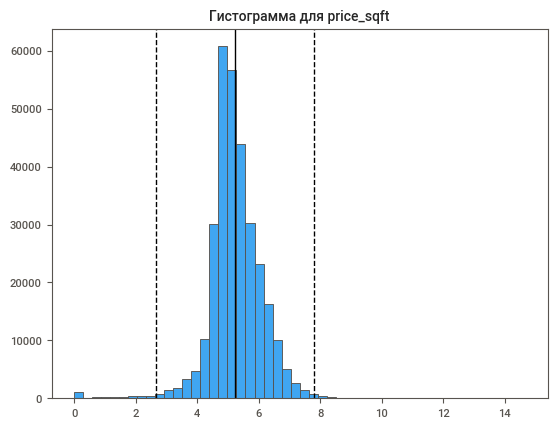

In [313]:
left = 3
right = 3
feat = 'price_sqft'
df['outliers_price_sqft'] = 0

outliers, cleaned = outliers_z_score(df=df, feature=feat,
                                     log_scale=True,
                                     left=left, right=right)

print(f'Число выбросов по методу z-отклонений для {feat}: {outliers.shape[0]}')
print(f'Результирующее число записей для {feat}: {cleaned.shape[0]}')
df.loc[outliers.index, 'outliers_price_sqft'] = 1

draw_hist(df, feat, left, right)

Число выбросов по методу z-отклонений для sqft: 2244
Результирующее число записей для sqft: 317018


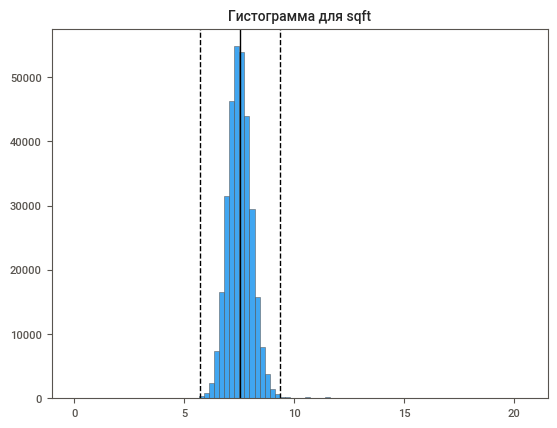

In [314]:
left = 3
right = 3
feat = 'sqft'
df['outliers_sqft'] = 0

outliers, cleaned = outliers_z_score(df=df, feature=feat,
                                     log_scale=True,
                                     left=left, right=right)

print(f'Число выбросов по методу z-отклонений для {feat}: {outliers.shape[0]}')
print(f'Результирующее число записей для {feat}: {cleaned.shape[0]}')
df.loc[outliers.index, 'outliers_sqft'] = 1

draw_hist(df, feat, left, right, bins=90)

Число выбросов по методу z-отклонений для sqft_diff: 3086
Результирующее число записей для sqft_diff: 302875


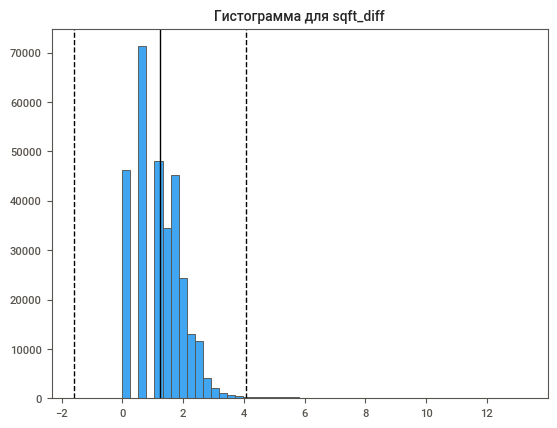

In [315]:
left = 3
right = 3
feat = 'sqft_diff'

outliers, cleaned = outliers_z_score(df=df, feature=feat,
                                     log_scale=True,
                                     left=left, right=right)

print(f'Число выбросов по методу z-отклонений для {feat}: {outliers.shape[0]}')
print(f'Результирующее число записей для {feat}: {cleaned.shape[0]}')

draw_hist(df, feat, left, right, log_scale=True)

Объединим признаки выбросов по трем признакам в один.

In [316]:
df['total_outliers'] = df['outliers'] + df['outliers_sqft'] + df ['outliers_price_sqft']
print('Всего к выбросам отнесено записей:', df[df['total_outliers'] > 0].shape[0])

Всего к выбросам отнесено записей: 22000


Посмотрим на разницу между вычисленным значением площади и значением из набора данных.

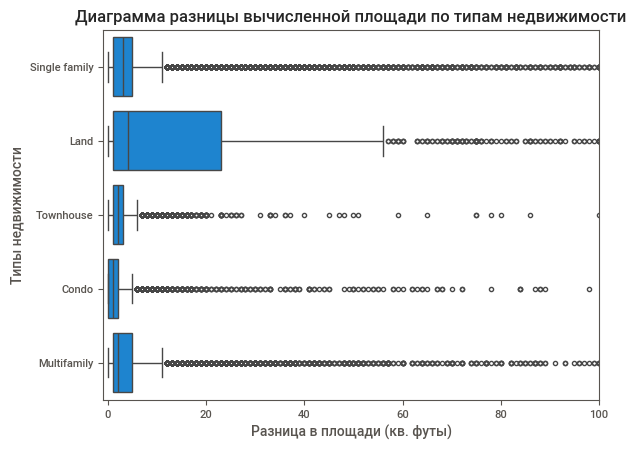

In [317]:
boxplot = sns.boxplot(
    data = df,
    x = 'sqft_diff',
    y = 'propertyType'
);
boxplot.set(xlim=(-1, 100));
boxplot.set_title('Диаграмма разницы вычисленной площади по типам недвижимости');
boxplot.set_xlabel('Разница в площади (кв. футы)');
boxplot.set_ylabel('Типы недвижимости');

Самое большое значения в 1,5 межквартильных размаха у типа недвижимости Land - 60кв футов. Примем за выбросы значение разницы больше этого значения. 

In [318]:
print('Записей с разницей выше 60 кв. футов:', df[df['sqft_diff'] > 60].shape[0])
print('Записей с разницей меньше или равно 60 кв. футов:', df[df['sqft_diff'] <= 60].shape[0])

diff_in_out = round(df[(df['sqft_diff']>60) & (df['total_outliers']>0)].shape[0] / df[df['total_outliers']>0].shape[0]*100)

print(f'Доля записей с разницей выше 60 кв. футов в выбросах: {diff_in_out}%')

Записей с разницей выше 60 кв. футов: 2998
Записей с разницей меньше или равно 60 кв. футов: 302963
Доля записей с разницей выше 60 кв. футов в выбросах: 11%


В выделенные выбросы признаков sqft и price_sqft попали 11% записей, где разница между указанной и расчетной площадью превышает 60 кв футов.
Можно считать признак sqft_diff погрешностью по отношению ко всем выбросам. Очистку будем делать исходной площади, итоговой цене и цене за кв фут.
Так же обнаружились записи в которых цена равна или меньше площади, уберем эти записи. 

In [319]:
ind = set(df[df['total_outliers'] > 0].index)
ind.update(df[df['sqft'] >= df['target']].index)
df = df.drop(list(ind), axis=0)

df = df.drop(['outliers','outliers_sqft', 'outliers_price_sqft', 'total_outliers', 'calc_sqft', 'sqft_diff'], axis=1)

print(f'Количество пропусков {df.sqft.isna().sum()} в признаке sqft ({round(df.sqft.isna().sum()/df.shape[0]*100,2)}%)')

df.dropna(axis=0, subset='sqft', inplace=True)
print('Эти записи удалены')

Количество пропусков 44623 в признаке sqft (12.81%)
Эти записи удалены


Посмотрим на диаграмму зависимости цены от площади. 

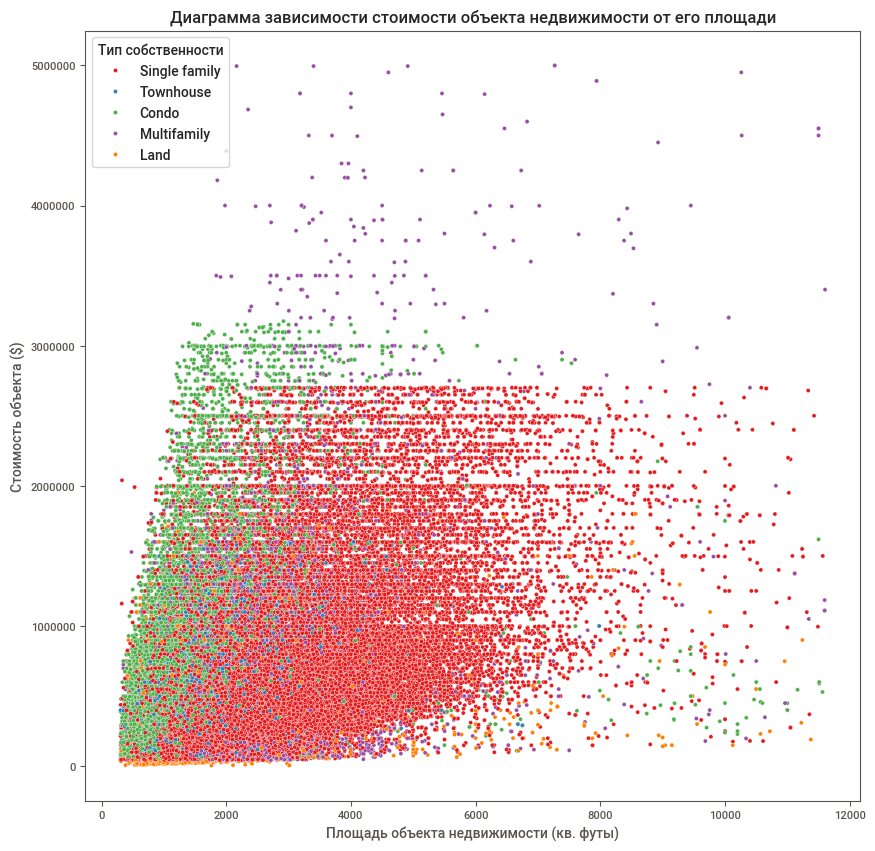

In [320]:
fig = plt.figure(figsize=(10, 10))
scatterplot = sns.scatterplot(
    data = df,
    x = 'sqft',
    y = 'target',
    hue = 'propertyType',
    palette = 'Set1'
)
scatterplot.set_title('Диаграмма зависимости стоимости объекта недвижимости от его площади')
scatterplot.set_xlabel('Площадь объекта недвижимости (кв. футы)')
scatterplot.set_ylabel('Стоимость объекта ($)')
scatterplot.legend(title = 'Тип собственности')

Видно, что с увеличением площади растет и цена, хотя есть большие по площади объекты, которые остаются дешевыми, оставим это специалистам по недвижимости.

Просматриваются горизонтальные линии среди всех типов недвижимости - это объясняется круглыми цифрами в цене.

Строгая линейная зависимость не просматривается, следовательно, нам понадобиться, что-нибудь по интереснее, чем просто модель линейной регрессии.  

### Признак school 

В этом признаке содержится сериализованный словарь данных о близлежащих школах:  
- рейтинг школы по десятибальной шкале,  
- расстояние до школы в милях,
- классы школы (начальные, средние и др.),  
- название школы.

Выделим несколько новых признаков:
- количество школ по близости,
- усредненный рейтинг близлежащих школ в зависимоти от растояния до них.

In [321]:
df[['sch_rating', 'sch_dist']] = df['schools'].apply(deserialize_school)

df['sch_rating'] = df['sch_rating'].apply(clear_list_school)
df['sch_dist'] = df['sch_dist'].apply(clear_list_school)

df['sch_rat_dist'] = df[['sch_rating', 'sch_dist']].apply(lambda x: mean_lists_school(*x), axis=1).round()

try:
    df['sch_number'] = df['sch_dist'] .apply(lambda x: len(x) if x is not np.NaN else np.NaN)
except:
    df['sch_number'] = df['sch_dist'] .apply(lambda x: len(eval(x)) if x is not np.NaN else np.NaN)

In [322]:
df['sch_rat_dist'].describe()

count    300681.000000
mean          6.025688
std           6.560195
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         333.000000
Name: sch_rat_dist, dtype: float64

In [323]:
df['sch_rat_dist'].value_counts()

sch_rat_dist
2.0      45141
3.0      40386
1.0      37202
4.0      35038
5.0      27424
         ...  
141.0        1
225.0        1
112.0        1
103.0        1
140.0        1
Name: count, Length: 125, dtype: int64

In [324]:
df['sch_number'].describe()

count    301388.000000
mean          4.180445
std           4.430283
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          65.000000
Name: sch_number, dtype: float64

In [325]:
df['sch_number'].value_counts()

sch_number
3.0     175701
8.0      32353
2.0      30329
5.0      22289
4.0      17003
6.0       7319
1.0       6432
7.0       3807
24.0      1683
10.0       651
11.0       566
63.0       551
13.0       446
22.0       401
9.0        370
65.0       335
12.0       318
49.0       234
14.0       233
15.0       108
61.0       105
16.0        95
21.0        58
26.0         1
Name: count, dtype: int64

Медианный рейтинг равен 4, нулевого значения нет. Встречаются аномальные значения, как на пример 333.

Что касается количества школ, то это в основном 3-4, но есть и значение в 65.

Удалять ничего не будем, возможно эти признаки еще уйдут, заполним пропуски, заполним медианой по типу недвижимости.

In [326]:
proper_sch_rat_med = df.groupby('propertyType')['sch_rat_dist'].median()
proper_sch_num_med = df.groupby('propertyType')['sch_number'].median()

for p in proper_sch_rat_med.index:
    mask1 = df['propertyType'] == p
    mask2 = df['sch_rat_dist'].isna() == True
    mask3 = df['sch_number'].isna() == True
    ind = df[mask1 & mask2]['sch_rat_dist'].index
    df.loc[ind, 'sch_rat_dist'] = proper_sch_rat_med[p]

    ind = df[mask1 & mask3]['sch_number'].index
    df.loc[ind, 'sch_number'] = proper_sch_num_med[p]

print('Пропуски в sch_rat_dist:', df['sch_rat_dist'].isna().sum())
print('Пропуски в sch_number:', df['sch_number'].isna().sum())

df = df.drop(['schools', 'sch_rating', 'sch_dist'], axis=1)

Пропуски в sch_rat_dist: 0
Пропуски в sch_number: 0


### Кодирование признаков

Уберем больше не нужные призначи и переведем категориальные преведем в цифровые.

In [327]:
df = df.drop(['street', 'homeFacts', 'city', 'price_sqft'], axis=1)

In [328]:
df['heating'] = df['heating'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df['cooling'] = df['cooling'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df['parking'] = df['parking'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

Убираем оствшиеся пропуски

In [329]:
df.dropna(inplace = True)

Посмотрим на уникальные значения в оставшихся категориальных признаках.

In [330]:
df.select_dtypes(include='object').nunique()

status           5
propertyType     5
state           33
stories          4
dtype: int64

Для признаков 'status', 'propertyType', 'stories' применим OneHotEncoder.

In [331]:
oh_cols = ['status', 'propertyType', 'stories']
encoder = ce.OneHotEncoder(cols=oh_cols, use_cat_names=True)
encoded_data = encoder.fit_transform(df[oh_cols])
df = pd.concat([df, encoded_data], axis=1)

Для state применим BinaryEncoder.

In [332]:
encoder = ce.BinaryEncoder(cols=['state'])
encoded_data = encoder.fit_transform(df[['state']])
df = pd.concat([df, encoded_data], axis=1)

In [333]:
df = df.drop(['status', 'propertyType', 'stories', 'state'], axis=1)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303835 entries, 0 to 377184
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   baths                           303835 non-null  float64
 1   sqft                            303835 non-null  float64
 2   beds                            303835 non-null  float64
 3   target                          303835 non-null  int32  
 4   heating                         303835 non-null  int32  
 5   cooling                         303835 non-null  int32  
 6   parking                         303835 non-null  int32  
 7   age                             303835 non-null  int32  
 8   sch_rat_dist                    303835 non-null  float64
 9   sch_number                      303835 non-null  float64
 10  status_Active                   303835 non-null  int64  
 11  status_Other                    303835 non-null  int64  
 12  status_New           

In [335]:
df.head()

baths    sqft  beds  target  heating  cooling  parking  age  sch_rat_dist  \
0    3.5  2900.0   4.0  418000        1        0        0    4           1.0   
1    3.0  1947.0   3.0  310000        0        0        0    4           3.0   
5    3.0   897.0   2.0  209000        1        1        0  103           5.0   
6    2.5  1507.0   3.0  181500        1        1        0   17           1.0   
7    2.5  1192.0   3.0   68000        0        0        0   47           4.0   

   sch_number  ...  stories_Low Rise (1-3 Stories)  \
0         8.0  ...                               1   
1         3.0  ...                               1   
5         3.0  ...                               1   
6         4.0  ...                               1   
7         3.0  ...                               1   

   stories_Mid Rise (4-7 Stories)  stories_0 Stories  \
0                               0                  0   
1                               0                  0   
5                               0                  0   
6                               0                  0   
7                               0                  0   

   stories_High Rise (8+ Stories)  state_0  state_1  state_2  state_3  \
0                               0        0        0        0        0   
1                               0        0        0        0        0   
5                               0        0        0        0        0   
6                               0        0        0        0        1   
7                               0        0        0        0        1   

   state_4  state_5  
0        0        1  
1        1        0  
5        1        1  
6        0        0  
7        0        1  

[5 rows x 30 columns]

In [336]:
df.shape

(303835, 30)

### Оценка мультиколлинеарности признаков  

Строим тепловую карту и проверяем нет ли сильной связи между признаками. Используем метод Пирсона. 

Text(0.5, 1.0, 'Тепловая карта мультиколлинеарности')

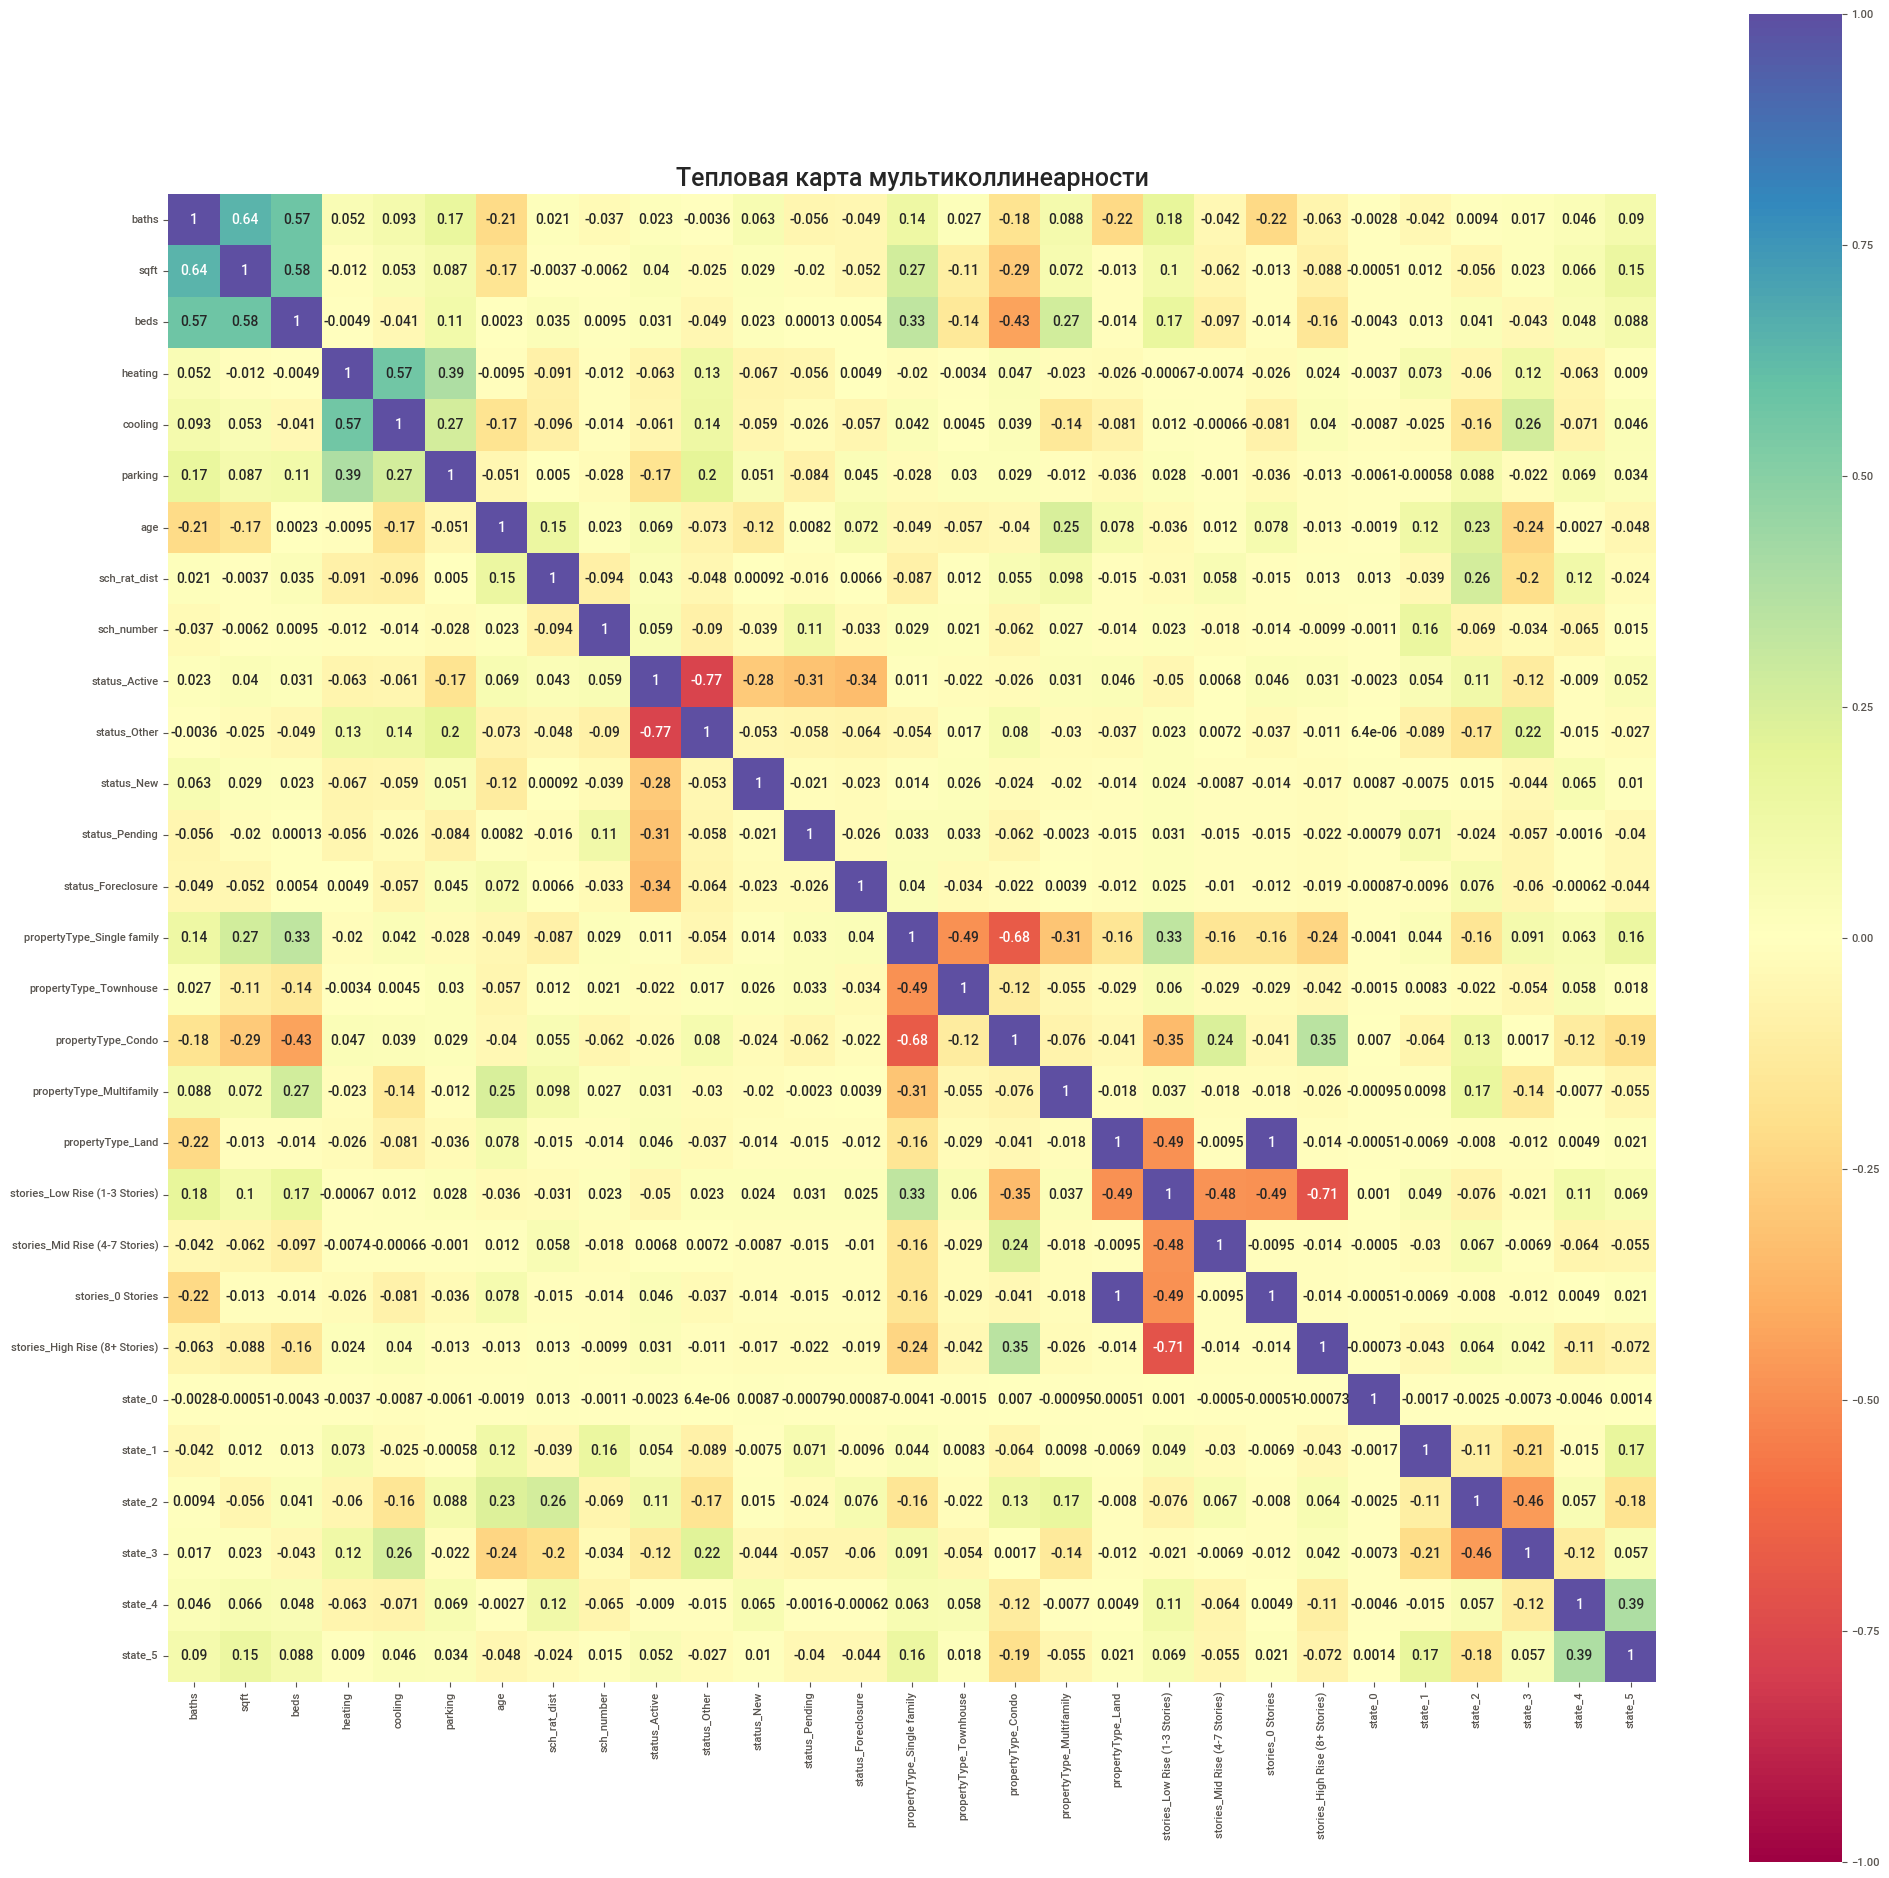

In [337]:
fig = plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(
    data = df.drop('target', axis=1).corr(method='pearson'),
    annot = True,
    fmt = '.2g',
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap= 'Spectral',
    square = True
)
heatmap.set_title('Тепловая карта мультиколлинеарности', fontsize=18)

Сразу видим сильную зависимость у "propertyType_Land" и "stories_0 Stories", что вполне логично, пустым участкам мы сами назначили нулевую этажность.

Удаляем признак stories_0 Stories.

Есть зависимость между площадью объекта недвижимости и количеством спальных и ванных комнат.

Проведем оценку значисомти признаков, а потом будем решать что с ними делать.

### Оценка значимости  

С помощью SelectKBest выбедем топ-20 признаков, проведет хи-тест и тесть ANOVA.

#### SelectKBest

In [338]:
kbest = SelectKBest(score_func=f_regression, k=20)

kbest.fit(df.drop('target', axis=1), df['target'])
kbest_columns = kbest.get_feature_names_out()

print('Топ-20 признаков', set(kbest_columns))

print('Остальные', set(df.drop('target', axis=1).columns).difference(set(kbest_columns)))

Топ-20 признаков {'heating', 'state_3', 'state_5', 'sch_number', 'propertyType_Multifamily', 'propertyType_Single family', 'propertyType_Townhouse', 'stories_Low Rise (1-3 Stories)', 'status_Active', 'parking', 'baths', 'state_4', 'state_2', 'stories_High Rise (8+ Stories)', 'sqft', 'beds', 'propertyType_Condo', 'sch_rat_dist', 'status_Foreclosure', 'state_1'}
Остальные {'status_Other', 'status_Pending', 'status_New', 'stories_Mid Rise (4-7 Stories)', 'age', 'stories_0 Stories', 'state_0', 'cooling', 'propertyType_Land'}


In [339]:
cat_cols = ['baths', 'beds', 'heating','cooling', 'parking', 'status_Active', 'status_Other', 'status_New', 'status_Pending', 'status_Foreclosure', 'propertyType_Single family', 'propertyType_Townhouse', 'propertyType_Condo', 'propertyType_Multifamily', 'propertyType_Land', 'stories_Low Rise (1-3 Stories)', 'stories_Mid Rise (4-7 Stories)', 'stories_0 Stories', 'stories_High Rise (8+ Stories)', 'state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5']

num_cols = ['sqft', 'age', 'sch_rat_dist', 'sch_number']

#### Хи-квадрат для категориальных признаков  

Text(0, 0.5, 'Признаки')

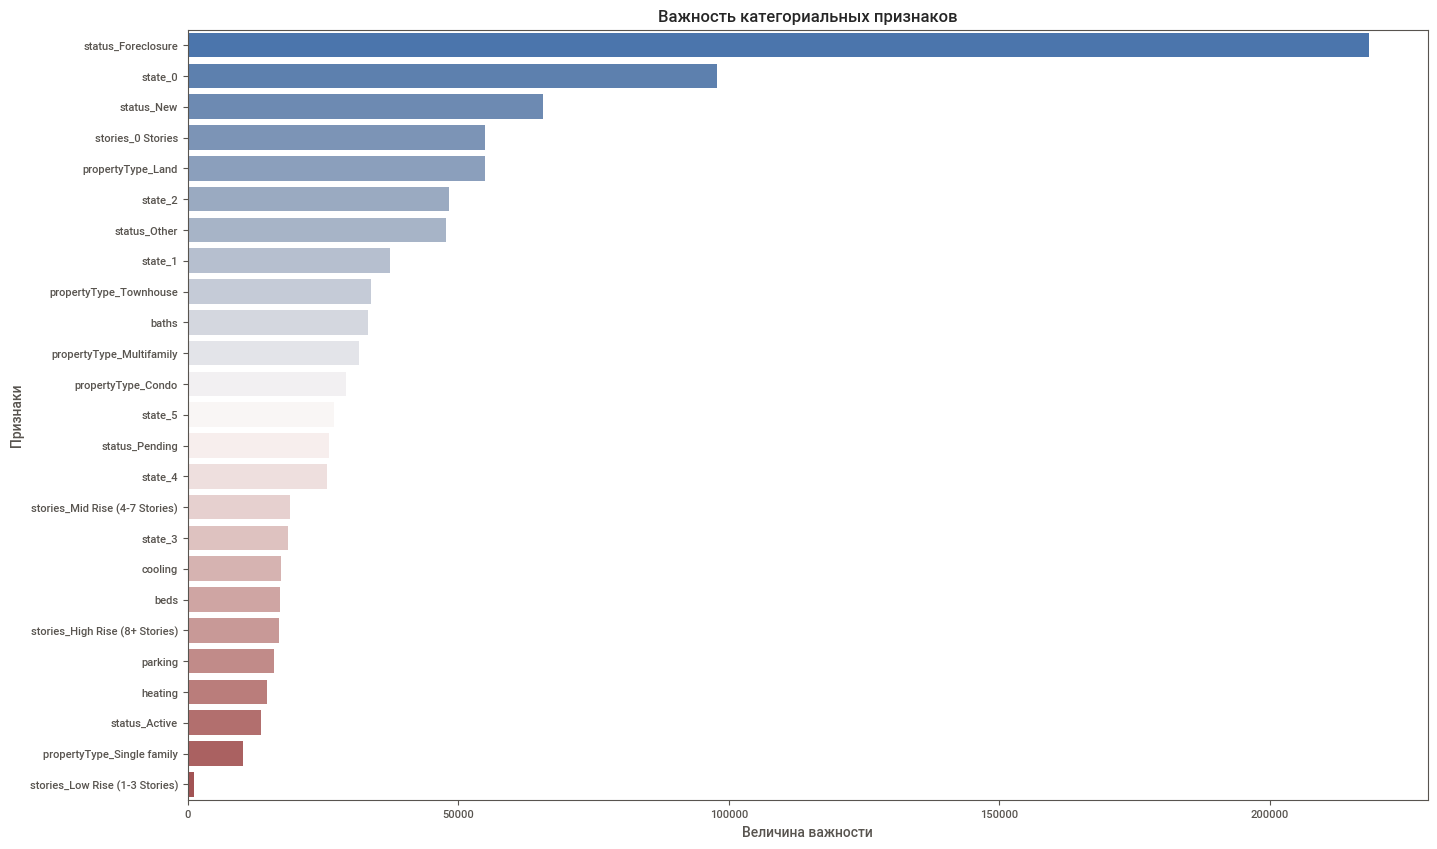

In [340]:
imp_cat = pd.Series(chi2(df[cat_cols], df.target)[0], index=cat_cols)
imp_cat = imp_cat.sort_values(ascending=False)

fig = plt.figure(figsize=(16, 10))
barplot = sns.barplot(
    data = imp_cat.to_frame(name='importance').reset_index(),
    x = 'importance',
    y = 'index',
    orient = 'h',
    palette = 'vlag'
)
barplot.set_title('Важность категориальных признаков', fontsize = 12)
barplot.set_xlabel('Величина важности')
barplot.set_ylabel('Признаки')

#### ANOVA для непрерывных признаков  

Text(0, 0.5, 'Признаки')

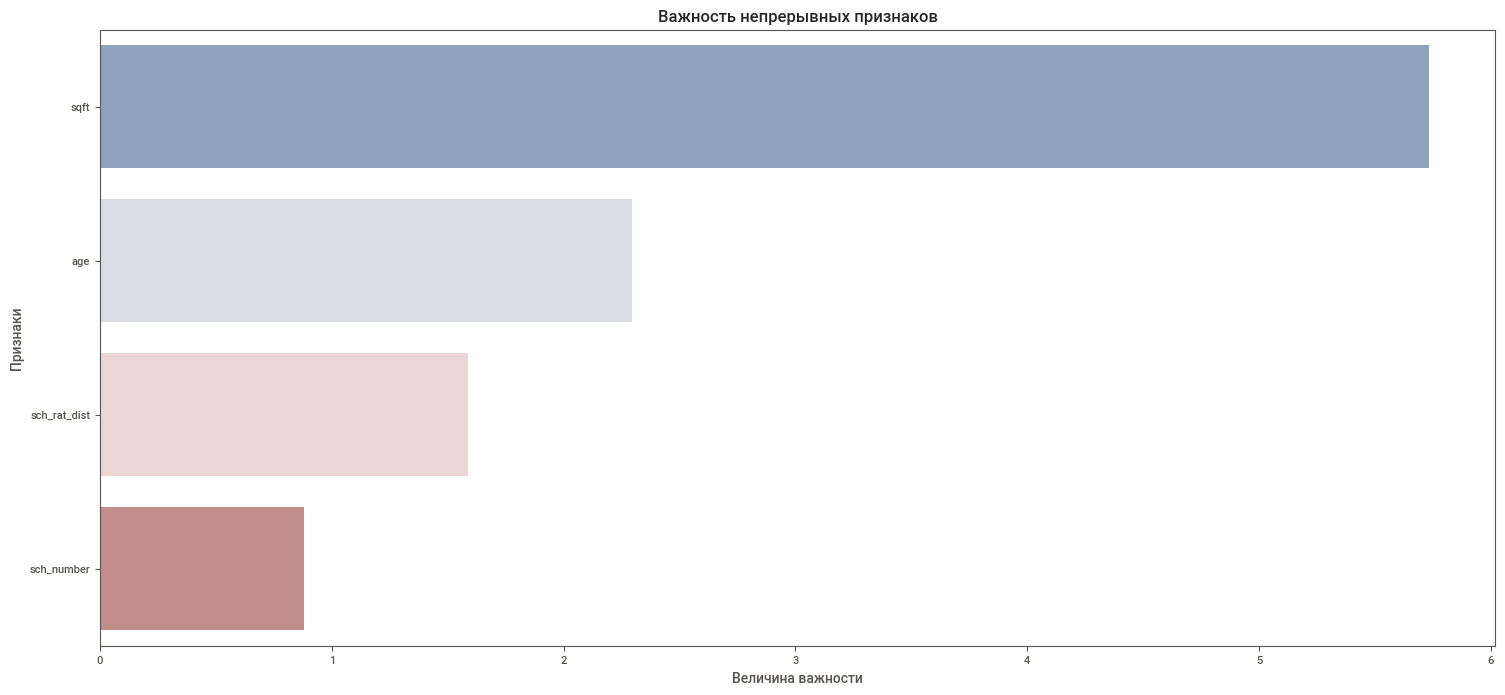

In [341]:
imp_num = pd.Series(f_classif(df[num_cols], df.target)[0], index = num_cols)
imp_num = imp_num.sort_values(ascending=False)

fig = plt.figure(figsize=(18, 8))
barplot = sns.barplot(
    data = imp_num.to_frame(name='importance').reset_index(),
    x = 'importance',
    y = 'index',
    orient = 'h',
    palette = 'vlag'
)
barplot.set_title('Важность непрерывных признаков', fontsize = 12)
barplot.set_xlabel('Величина важности')
barplot.set_ylabel('Признаки')

Хи-тест расположил признаки "propertyType_Land" и "stories_0 Stories" на 4-м и 5-м местах.  

Наибольшей важности у статуса продаваемой недвижимости - "Foreclosure" - продажа недвижимости, вернувшейся к кредитору из-за неуплаты ипотеки. Возможно такая недвижимость повторно выходит на рынок со сниженной ценой, но опять так это больше вопрос к спецалистам в этой области. 

Теста ANOVA, поазал, что площадь недвижимости является наиглавшейним признаком среди остальных непрерывных с точки зрения влияния на стоимость объекта.
 
Школы и их рейтинг оказались менее важным параметром, чем год постройки.   

Разделяем набор данных.

In [342]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212684, 29) (91151, 29) (212684,) (91151,)


## Решение задачи регрессии

План действий такой, идем от простых моделей к более сложным:
- LinearRegression (baseline)
- LinearRregression + PolynomialFeatures,  
- DecisionTreeRegressor,  
- RandomForestRegressor,  
- GradientBoostingRegressor,  
- StackingRegressor,  
- CatBoostRegressor.  

Подбор гиперпараметров делаем с помощью:  
- RandomizedSearchCV,  
- Optuna.  

### LinearRegression (baseline)

In [343]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

MAE на тренировочоной выборке: 204355.4
MAPE на тренировочной выборке: 61.75
r2 на тренировочоной выборке: 0.46

MAE на тестовой выборке: 203637.12
MAPE на тестовой выборке: 61.36
r2 на тестовой выборке: 0.46


> **Выводы по LinearRegression:**
>
> После предварительной обработки модель показала `MAPE` = 84.66%, `R2` = 0.25 и абсолютную ошибку в 250 тыс.
>
> Генерирование новых признаков, дополнительная обработка и очистка уже имевшихся принесли почти двоекратное улучшение целевой метрики `R2` - до 0.46 и снижение абсолютной ошибки почти на 50 тыс.
>

### LinearRregression + PolynomialFeatures

In [344]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
%time poly_model.fit(X_train_poly, y_train)

y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

CPU times: total: 11.2 s
Wall time: 5.34 s
MAE на тренировочоной выборке: 176514.46
MAPE на тренировочной выборке: 50.51
r2 на тренировочоной выборке: 0.57

MAE на тестовой выборке: 177174.64
MAPE на тестовой выборке: 50.47
r2 на тестовой выборке: 0.46


> **Выводы по LinearRregression + PolynomialFeatures:**  
>
> Полиномиальная регрессия 2-го порядка улучшила метрики линейной регрессии: значительное снижение `MAPE` и `MAE`, `R2` на прежнем уровне.    

### DecisionTreeRegressor

Подберем максимальную глубину дерева.

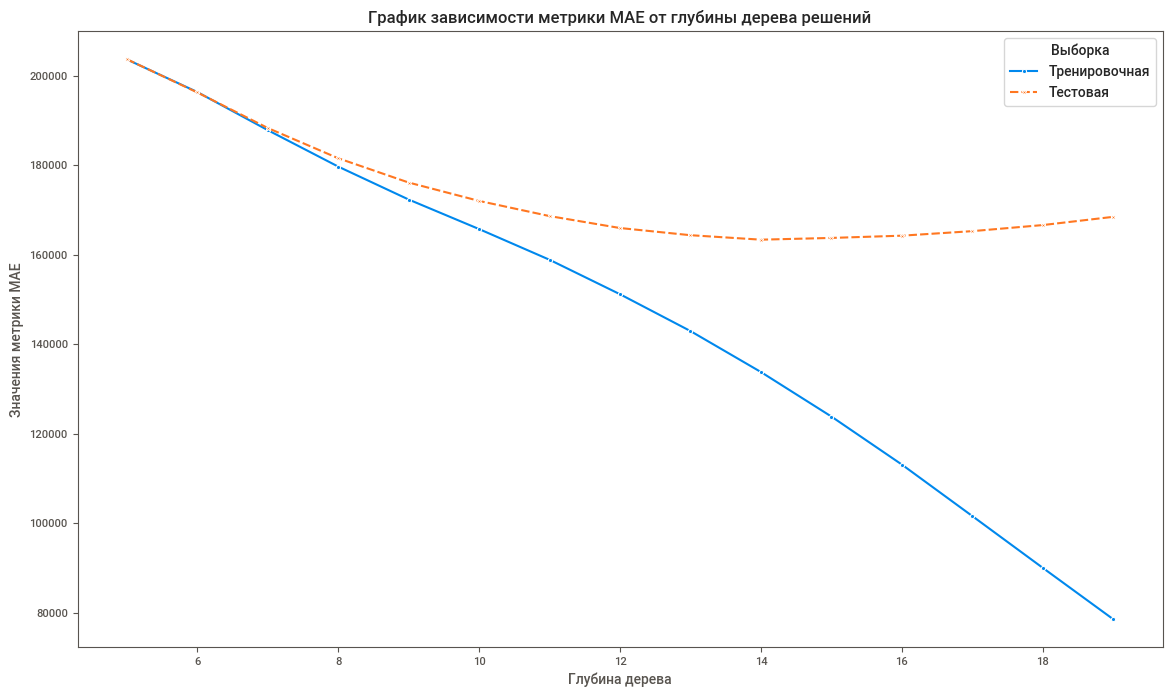

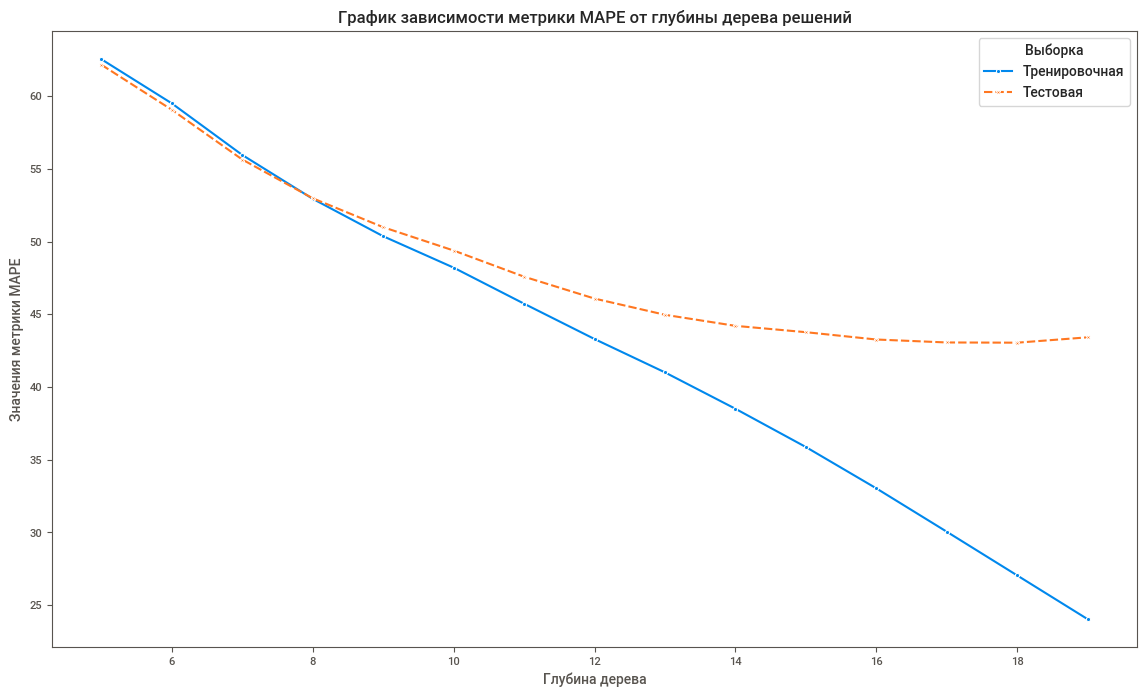

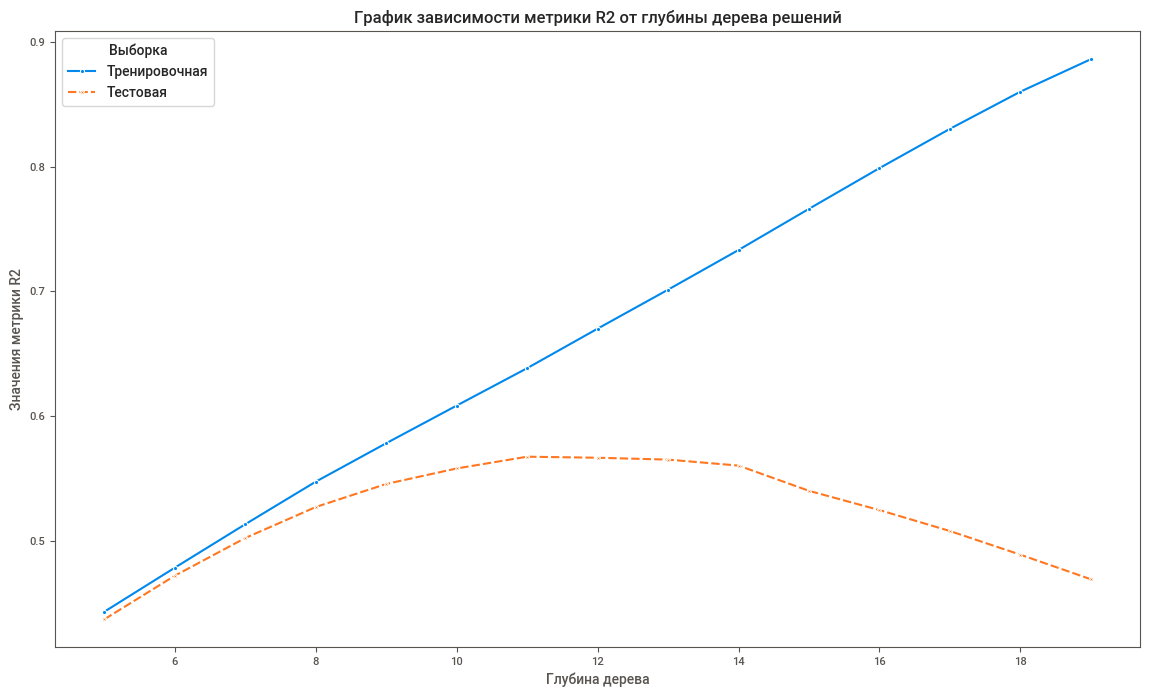

In [345]:
depths = list(np.arange(5, 20))
mae_train_score = []
mae_test_score = []
mape_train_score = []
mape_test_score = []
r2_train_score = []
r2_test_score = []

for d in depths:
    tree_reg = DecisionTreeRegressor(
        max_depth = d,
        random_state = 42)

    tree_reg.fit(X_train, y_train)

    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)

    mae_train, mape_train, r2_train, mae_test, mape_test, r2_test \
        = show_metrics(y_train, y_train_pred, y_test, y_test_pred, show = False)

    mae_train_score.append(mae_train)
    mae_test_score.append(mae_test)
    mape_train_score.append(mape_train)
    mape_test_score.append(mape_test)
    r2_train_score.append(r2_train)
    r2_test_score.append(r2_test)


mae_df = pd.DataFrame(
    data = {'Тренировочная': mae_train_score,
            'Тестовая': mae_test_score},
    index = depths)

mape_df = pd.DataFrame(
    data = {'Тренировочная': mape_train_score,
            'Тестовая': mape_test_score},
    index = depths)

r2_df = pd.DataFrame(
    data = {'Тренировочная': r2_train_score,
            'Тестовая': r2_test_score},
    index = depths)

fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = mae_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики MAE от глубины дерева решений')
lineplot.set_ylabel('Значения метрики MAE')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = mape_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики MAPE от глубины дерева решений')
lineplot.set_ylabel('Значения метрики MAPE')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = r2_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики R2 от глубины дерева решений')
lineplot.set_ylabel('Значения метрики R2')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

На графике зависимости `MAE`, оптимальной глубиной является 15, после чего метрика на тестовой выборке начинает расти при продолжающей снижаться метрике на тренировочной выборке. Это свидетельствует о переобучении модели.  

Для метрики `MAPE`, наименьшее значение наблюдается при глубине 18. 

Метрика `R2` перестает улучшаться после глубины 12.  

Попробуем подобрать минимального количества листьев в узле дерева `min_samples_leaf`.  

Давайте обучим дерево с максимальной глубиной 15 и минимальным количеством листьев = 10 и увидим, как изменятся метрики.  

In [346]:
print('MAE:', mae_test_score[depths.index(15)])
print('MAPE:', mape_test_score[depths.index(15)])
print('R2:', r2_test_score[depths.index(15)])

MAE: 163748.99358931894
MAPE: 43.77406262379344
R2: 0.5399183988217293


In [347]:
tree_reg = DecisionTreeRegressor(
    max_depth = 15,
    min_samples_leaf = 10,
    random_state = 42)

%time tree_reg.fit(X_train, y_train)

y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

CPU times: total: 312 ms
Wall time: 1.05 s
MAE на тренировочоной выборке: 143342.78
MAPE на тренировочной выборке: 39.27
r2 на тренировочоной выборке: 0.69

MAE на тестовой выборке: 162043.34
MAPE на тестовой выборке: 43.24
r2 на тестовой выборке: 0.58


>**Выводы по модели DecisionTreeRegressor:**  
>
> Благодаря введению дополнительного параметра модели - минимального количества листьев, Были улучшены 2 метрики из 3: `MAPE` ухудшилась, т.к. глубина 15 не была для нее оптимальной.    

### RandomForestRegressor

In [348]:
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': np.arange(11, 18, 2),
    'min_samples_leaf': [5, 10, 15]
}

rand_search = RandomizedSearchCV(
    estimator = RandomForestRegressor(
        n_jobs = -1,
        warm_start = True,
        random_state = 42),
    param_distributions = param_distributions,
    cv = 2,
    scoring = 'r2',
    return_train_score = False,
    n_jobs = -1,
    verbose = 1
)

%time rand_search.fit(X_train, y_train)

y_train_pred = rand_search.predict(X_train)
y_test_pred = rand_search.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
CPU times: total: 4min 5s
Wall time: 3min 59s
MAE на тренировочоной выборке: 121187.07
MAPE на тренировочной выборке: 34.06
r2 на тренировочоной выборке: 0.78

MAE на тестовой выборке: 146084.41
MAPE на тестовой выборке: 39.79
r2 на тестовой выборке: 0.66


In [349]:
print('Наилучшие значения гиперпараметров:', rand_search.best_params_)

Наилучшие значения гиперпараметров: {'n_estimators': 150, 'min_samples_leaf': 5, 'max_depth': 17}


>**Выводы по модели RandomForestRegressor:**  
>
> Более сложная модель - лучшие результаты. В том числе и благодаря алгоритму подбора оптимальных гиперпараметров.    

### GradientBoostingRegressor

In [350]:
grad_boost_reg = GradientBoostingRegressor(
    learning_rate = 0.1,
    n_estimators = 100,
    max_depth = 15,
    min_samples_split = 20,
    random_state = 42
)

%time grad_boost_reg.fit(X_train, y_train)

y_train_pred = grad_boost_reg.predict(X_train)
y_test_pred = grad_boost_reg.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

CPU times: total: 42.6 s
Wall time: 1min 50s
MAE на тренировочоной выборке: 85354.23
MAPE на тренировочной выборке: 24.98
r2 на тренировочоной выборке: 0.9

MAE на тестовой выборке: 139120.87
MAPE на тестовой выборке: 37.03
r2 на тестовой выборке: 0.68


>**Выводы по модели GradientBoostingRegressor:**  
>
> Меньшее количество деревьев принесло лучший результат, чем RandomForest: `R2` = 0.68, `MAPE` = 37%.  
>
> Возможно модель немного переобучилась, если смотреть на высокий показатель `R2` = 0.9 на тренировочной выборке. Но две другие метрики не спустились до нуля, так что не будем на это обращать внимание.  

### StackingRegressor

Объединим работу трех моделей при помощи стэкинга.

In [351]:
estimators = [
    ('dt', DecisionTreeRegressor(
        max_depth = 15,
        min_samples_leaf = 10,
        random_state = 42)
     ),
    ('rf', RandomForestRegressor(
        n_estimators = 150,
        max_depth = 17,
        min_samples_leaf = 5,
        n_jobs = -1,
        warm_start = True,
        random_state = 42)
     ),
    ('gb', GradientBoostingRegressor(
        learning_rate = 0.1,
        n_estimators = 100,
        max_depth = 15,
        min_samples_split = 20,
        random_state = 42)
     )
]

stack_reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(
        n_estimators = 150,
        max_depth = 17,
        min_samples_leaf = 5,
        n_jobs = -1,
        warm_start = True,
        random_state = 42),
    cv = 2,
    n_jobs = -1,
    verbose = 5
)

%time stack_reg.fit(X_train, y_train)

y_train_pred = stack_reg.predict(X_train)
y_test_pred = stack_reg.predict(X_test)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

CPU times: total: 5min 46s
Wall time: 3min 58s
MAE на тренировочоной выборке: 97204.84
MAPE на тренировочной выборке: 27.2
r2 на тренировочоной выборке: 0.86

MAE на тестовой выборке: 140820.53
MAPE на тестовой выборке: 37.27
r2 на тестовой выборке: 0.68


>**Выводы по модели StackingRegressor:**
>
> Три независимые модели не смогли сколь-нибудь значимо улучшить постигнутые показатели. `MAPE` осталась на том же уровне, `MAE` улучшилась на 1 тыс., а `R2` осталась прежней.  

###  CatBoostRegressor + Optuna

In [352]:
def optuna_rf(trial, cv = 3, X = X_train, y = y_train):
    """
    Функция расчета целевой метрики
    """

    iterations = trial.suggest_int('iterations', 20, 50, 10)
    depth = trial.suggest_int('depth', 11, 15, 2)
    learning_rate = trial.suggest_float('learning_rate', 0.3, 1.0, step=0.1)

    model = CatBoostRegressor(
        iterations = iterations,
        depth = depth,
        learning_rate = learning_rate,
        loss_function = 'RMSE',
        random_state = 42,
        thread_count = -1,
        boosting_type = 'Plain',
        verbose = False
    )

    train_pool = Pool(X, y)

    model.fit(train_pool)
    score = cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1).mean()

    return score

In [353]:
study = optuna.create_study(study_name='CatBoostRegressor', direction='maximize')

# Оптимизация гиперпараметров 10 раз
%time study.optimize(optuna_rf, n_trials=10)

[I 2023-10-14 18:44:00,556] A new study created in memory with name: CatBoostRegressor
[I 2023-10-14 18:44:10,968] Trial 0 finished with value: 0.6378360944822847 and parameters: {'iterations': 30, 'depth': 13, 'learning_rate': 0.8}. Best is trial 0 with value: 0.6378360944822847.
[I 2023-10-14 18:44:17,823] Trial 1 finished with value: 0.6407759247344521 and parameters: {'iterations': 20, 'depth': 13, 'learning_rate': 0.3}. Best is trial 1 with value: 0.6407759247344521.
[I 2023-10-14 18:44:30,916] Trial 2 finished with value: 0.6488024148643813 and parameters: {'iterations': 40, 'depth': 13, 'learning_rate': 0.6000000000000001}. Best is trial 2 with value: 0.6488024148643813.
[I 2023-10-14 18:44:39,387] Trial 3 finished with value: 0.6512054289257599 and parameters: {'iterations': 50, 'depth': 11, 'learning_rate': 0.5}. Best is trial 3 with value: 0.6512054289257599.
[I 2023-10-14 18:45:16,235] Trial 4 finished with value: 0.6270751735723578 and parameters: {'iterations': 40, 'depth'

CPU times: total: 1min 5s
Wall time: 2min 34s


In [354]:
# Продолжим подбор гиперпараметров: добавим еще 10 итераций
%time study.optimize(optuna_rf, n_trials=10)

[I 2023-10-14 18:46:44,079] Trial 10 finished with value: 0.6512054289257599 and parameters: {'iterations': 50, 'depth': 11, 'learning_rate': 0.5}. Best is trial 3 with value: 0.6512054289257599.
[I 2023-10-14 18:46:50,306] Trial 11 finished with value: 0.6512054289257599 and parameters: {'iterations': 50, 'depth': 11, 'learning_rate': 0.5}. Best is trial 3 with value: 0.6512054289257599.
[I 2023-10-14 18:46:55,283] Trial 12 finished with value: 0.6474903797573609 and parameters: {'iterations': 40, 'depth': 11, 'learning_rate': 0.5}. Best is trial 3 with value: 0.6512054289257599.
[I 2023-10-14 18:47:01,320] Trial 13 finished with value: 0.6525736056217041 and parameters: {'iterations': 50, 'depth': 11, 'learning_rate': 0.4}. Best is trial 13 with value: 0.6525736056217041.
[I 2023-10-14 18:47:07,228] Trial 14 finished with value: 0.6525736056217041 and parameters: {'iterations': 50, 'depth': 11, 'learning_rate': 0.4}. Best is trial 13 with value: 0.6525736056217041.
[I 2023-10-14 18:4

CPU times: total: 22.8 s
Wall time: 1min 22s


In [355]:
print('Наилучшие значения гиперпараметров:', study.best_params)
print('r2 на тренировочной выборке:', round(study.best_value, 2))

Наилучшие значения гиперпараметров: {'iterations': 50, 'depth': 13, 'learning_rate': 0.4}
r2 на тренировочной выборке: 0.66


In [356]:
cat_boo_reg = CatBoostRegressor(**study.best_params,
                                thread_count = -1,
                                boosting_type = 'Plain',
                                verbose = False,
                                random_state = 42)

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test)

%time cat_boo_reg.fit(train_pool)

y_train_pred = cat_boo_reg.predict(train_pool)
y_test_pred = cat_boo_reg.predict(test_pool)

_ = show_metrics(y_train, y_train_pred, y_test, y_test_pred)

CPU times: total: 4.34 s
Wall time: 4.95 s
MAE на тренировочоной выборке: 134236.09
MAPE на тренировочной выборке: 36.7
r2 на тренировочоной выборке: 0.73

MAE на тестовой выборке: 147047.84
MAPE на тестовой выборке: 39.3
r2 на тестовой выборке: 0.67


>**Выводы по модели CatBoostRegressor:**
>
> Полученные результаты можно сравнить с RandomizedSearchCV, но плюсы этой модели в другом, она дает приемлемые результаты с плохо подготовленными данными.
>


### Итоговые результаты по моделям

| Model                                  | MAE           | MAPE      | r2       |
|----------------------------------------|---------------|-----------|----------|
| LinearRegression                       | 203637.12     | 61.36     | 0.46     |
| LinearRregression + PolynomialFeatures | 177174.64     | 50.47     | 0.46     |
| DecisionTreeRegressor                  | 162043.34     | 43.24     | 0.58     |
| RandomizedSearchCV                     | 146084.41     | 39.79     | 0.66     |
| **GradientBoostingRegressor**          | **139120.87** | **37.03** | **0.68** |
| StackingRegressor                      | 140820.53     | 37.27     | 0.68     |
| CatBoostRegressor                      | 147047.84     | 39.3      | 0.67     |


По результатам видно, как с возрастанием сложности модели растут и результаты.
Победителем можно считать GradientBoostingRegressor, эту модель и будем использовать для создания сервиса предсказания цены. 

## Сохранение модели для веб-сервиса

In [357]:
with open('model/model.pkl', 'wb') as output:
    pickle.dump(grad_boost_reg, output)

In [359]:
# Задаем тестовый набор
test_data = [
    3.0,        # bath
    2000.0,     # sqft
    3.0,        # beds
    1,          # heating
    0,          # cooling
    0,          # parking
    99,         # age
    7.0,        # sch_rat_dist
    3.0,        # sch_number
    1,          # status_Active
    0,          # status_Other
    0,          # status_New
    0,          # status_Pending
    0,          # status_Foreclosure
    0,          # propertyType_Single family
    0,          # propertyType_Townhouse
    1,          # propertyType_Condo
    0,          # propertyType_Multifamily
    0,          # propertyType_Land
    0,          # stories_Low Rise (1-3 Stories)
    0,          # stories_Mid Rise (4-7 Stories)
    0,          # stories_0 Stories
    1,          # stories_High Rise (8+ Stories)
    0,          # state_0
    0,          # state_1
    1,          # state_2
    1,          # state_3
    0,          # state_4
    1           # state_5
]
test_data = np.array(test_data).reshape(1, -1)

# Выполняем предсказание с помощью обученной модели
prediction = grad_boost_reg.predict(test_data)

print('Ожидаемый ответ сервиса', round(prediction[0]))

Ожидаемый ответ сервиса 580375


## Сборка приложения

In [365]:
!cd app && docker build -t "project7" .

#1 [internal] load .dockerignore
#1 transferring context: 2B done
#1 DONE 0.1s

#2 [internal] load build definition from Dockerfile
#2 transferring dockerfile: 195B done
#2 DONE 0.1s

#3 [internal] load metadata for docker.io/library/python:3.10
#3 DONE 2.0s

#4 [internal] load build context
#4 DONE 0.0s

#5 [1/5] FROM docker.io/library/python:3.10@sha256:a20ae344b668753817b8bffb8628e068278d8ddbde1657f7b836fd74559beacd
#5 resolve docker.io/library/python:3.10@sha256:a20ae344b668753817b8bffb8628e068278d8ddbde1657f7b836fd74559beacd 0.1s done
#5 sha256:a20ae344b668753817b8bffb8628e068278d8ddbde1657f7b836fd74559beacd 1.65kB / 1.65kB done
#5 sha256:1ccc26d841b4acc2562483bf393ce1cf8bc358ced09ccd825425226827c79c92 0B / 24.05MB 0.1s
#5 sha256:800d84653581fc119cd75cd572fa190d3b813d49221b9e5ee463e3560e2cb342 0B / 64.13MB 0.1s
#5 sha256:1ec5637368df21bc2f12b29328e2462510c6bd56a5214d7bffa58575760b5d8b 2.01kB / 2.01kB done
#5 sha256:be529ebc30483bb55b3d38c8d57bd7d450fd1b5577a0036b839f7f711a4991bf 7

In [366]:
!docker images

REPOSITORY                         TAG       IMAGE ID       CREATED          SIZE
project7                           latest    05f728b3f852   29 seconds ago   1.3GB
mochoa/pgadmin4-docker-extension   7.7.0     fe27f19a6685   3 weeks ago      11.8MB
dpage/pgadmin4                     7.7       ce8ae42da4a0   3 weeks ago      545MB
portainer/portainer-ce             latest    3d18fe6d6805   4 months ago     273MB


In [367]:
!docker run -d --rm --name=project7 -p 5000:5000 project7:latest 

0d8498131e21f071cccedc8d92022eccb4cc390a9d7d67c8e66511efcedf40ab


In [368]:
import requests

r = requests.post(
    'http://localhost:5000/api/v1/predict',
    json={
        "bath": 3,
        "sqft": 2000,
        "beds": 3,
        "heating": 1,
        "cooling": 0,
        "parking": 0,
        "age": 99,
        "sch_rat_dist": 7,
        "sch_number": 3,
        "status_Active": 1,
        "status_Other": 0,
        "status_New": 0,
        "status_Pending": 0,
        "status_Foreclosure": 0,
        "propertyType_Single_family": 0,
        "propertyType_Townhouse": 0,
        "propertyType_Condo": 1,
        "propertyType_Multifamily": 0,
        "propertyType_Land": 0,
        "stories_Low_Rise": 0,
        "stories_Mid_Rise": 0,
        "stories_0_Stories": 0,
        "stories_High_Rise": 1,
        "state_0": 0,
        "state_1": 0,
        "state_2": 1,
        "state_3": 1,
        "state_4": 0,
        "state_5": 1
    }
)

print('Статус сервера:', r.status_code)

if r.status_code == 200:
    print('Ответ сервера - предсказание:', r.json()['prediction'])
else:
    print('Ответ сервера:', r.text)

Статус сервера: 200
Ответ сервера - предсказание: 580375


In [369]:
!docker ps

CONTAINER ID   IMAGE                    COMMAND             CREATED              STATUS              PORTS                                                      NAMES
0d8498131e21   project7:latest          "python ./app.py"   About a minute ago   Up About a minute   0.0.0.0:5000->5000/tcp                                     project7
3499b94fe2e8   portainer/portainer-ce   "/portainer"        8 weeks ago          Up 11 minutes       0.0.0.0:8000->8000/tcp, 0.0.0.0:9000->9000/tcp, 9443/tcp   portainer


In [370]:
!docker stop 0d8498131e21

0d8498131e21
